In [3]:
# Some standard import statements that are nice for Jupyter

import sys
import os
import logging

import numpy as np

from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 200

import time

import json

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

# importing my model functions for analysis
from psi_transmission.model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Proton Beam Fluctuations

This data is coming directly from PSI, and gives information on how the proton beam current fluctuated throughout the experiment. We expect to see large fluctuations corresponding to where we have missing runs in the data that Edgard had pre-processed. The plot from his slides is shown below:

![](../misc/p_beam_fluctuate.png)
![](jonahberean/psi_transmission/misc/p_beam_fluctuate.png)

## Monitoring Beam Current Data

As per Bernhard's instructions:

>2RGQ00CE004      this is the proton beam current which you can use for monitoring<br/>
this detector measures the proton beam current at the exit of the cyclotron

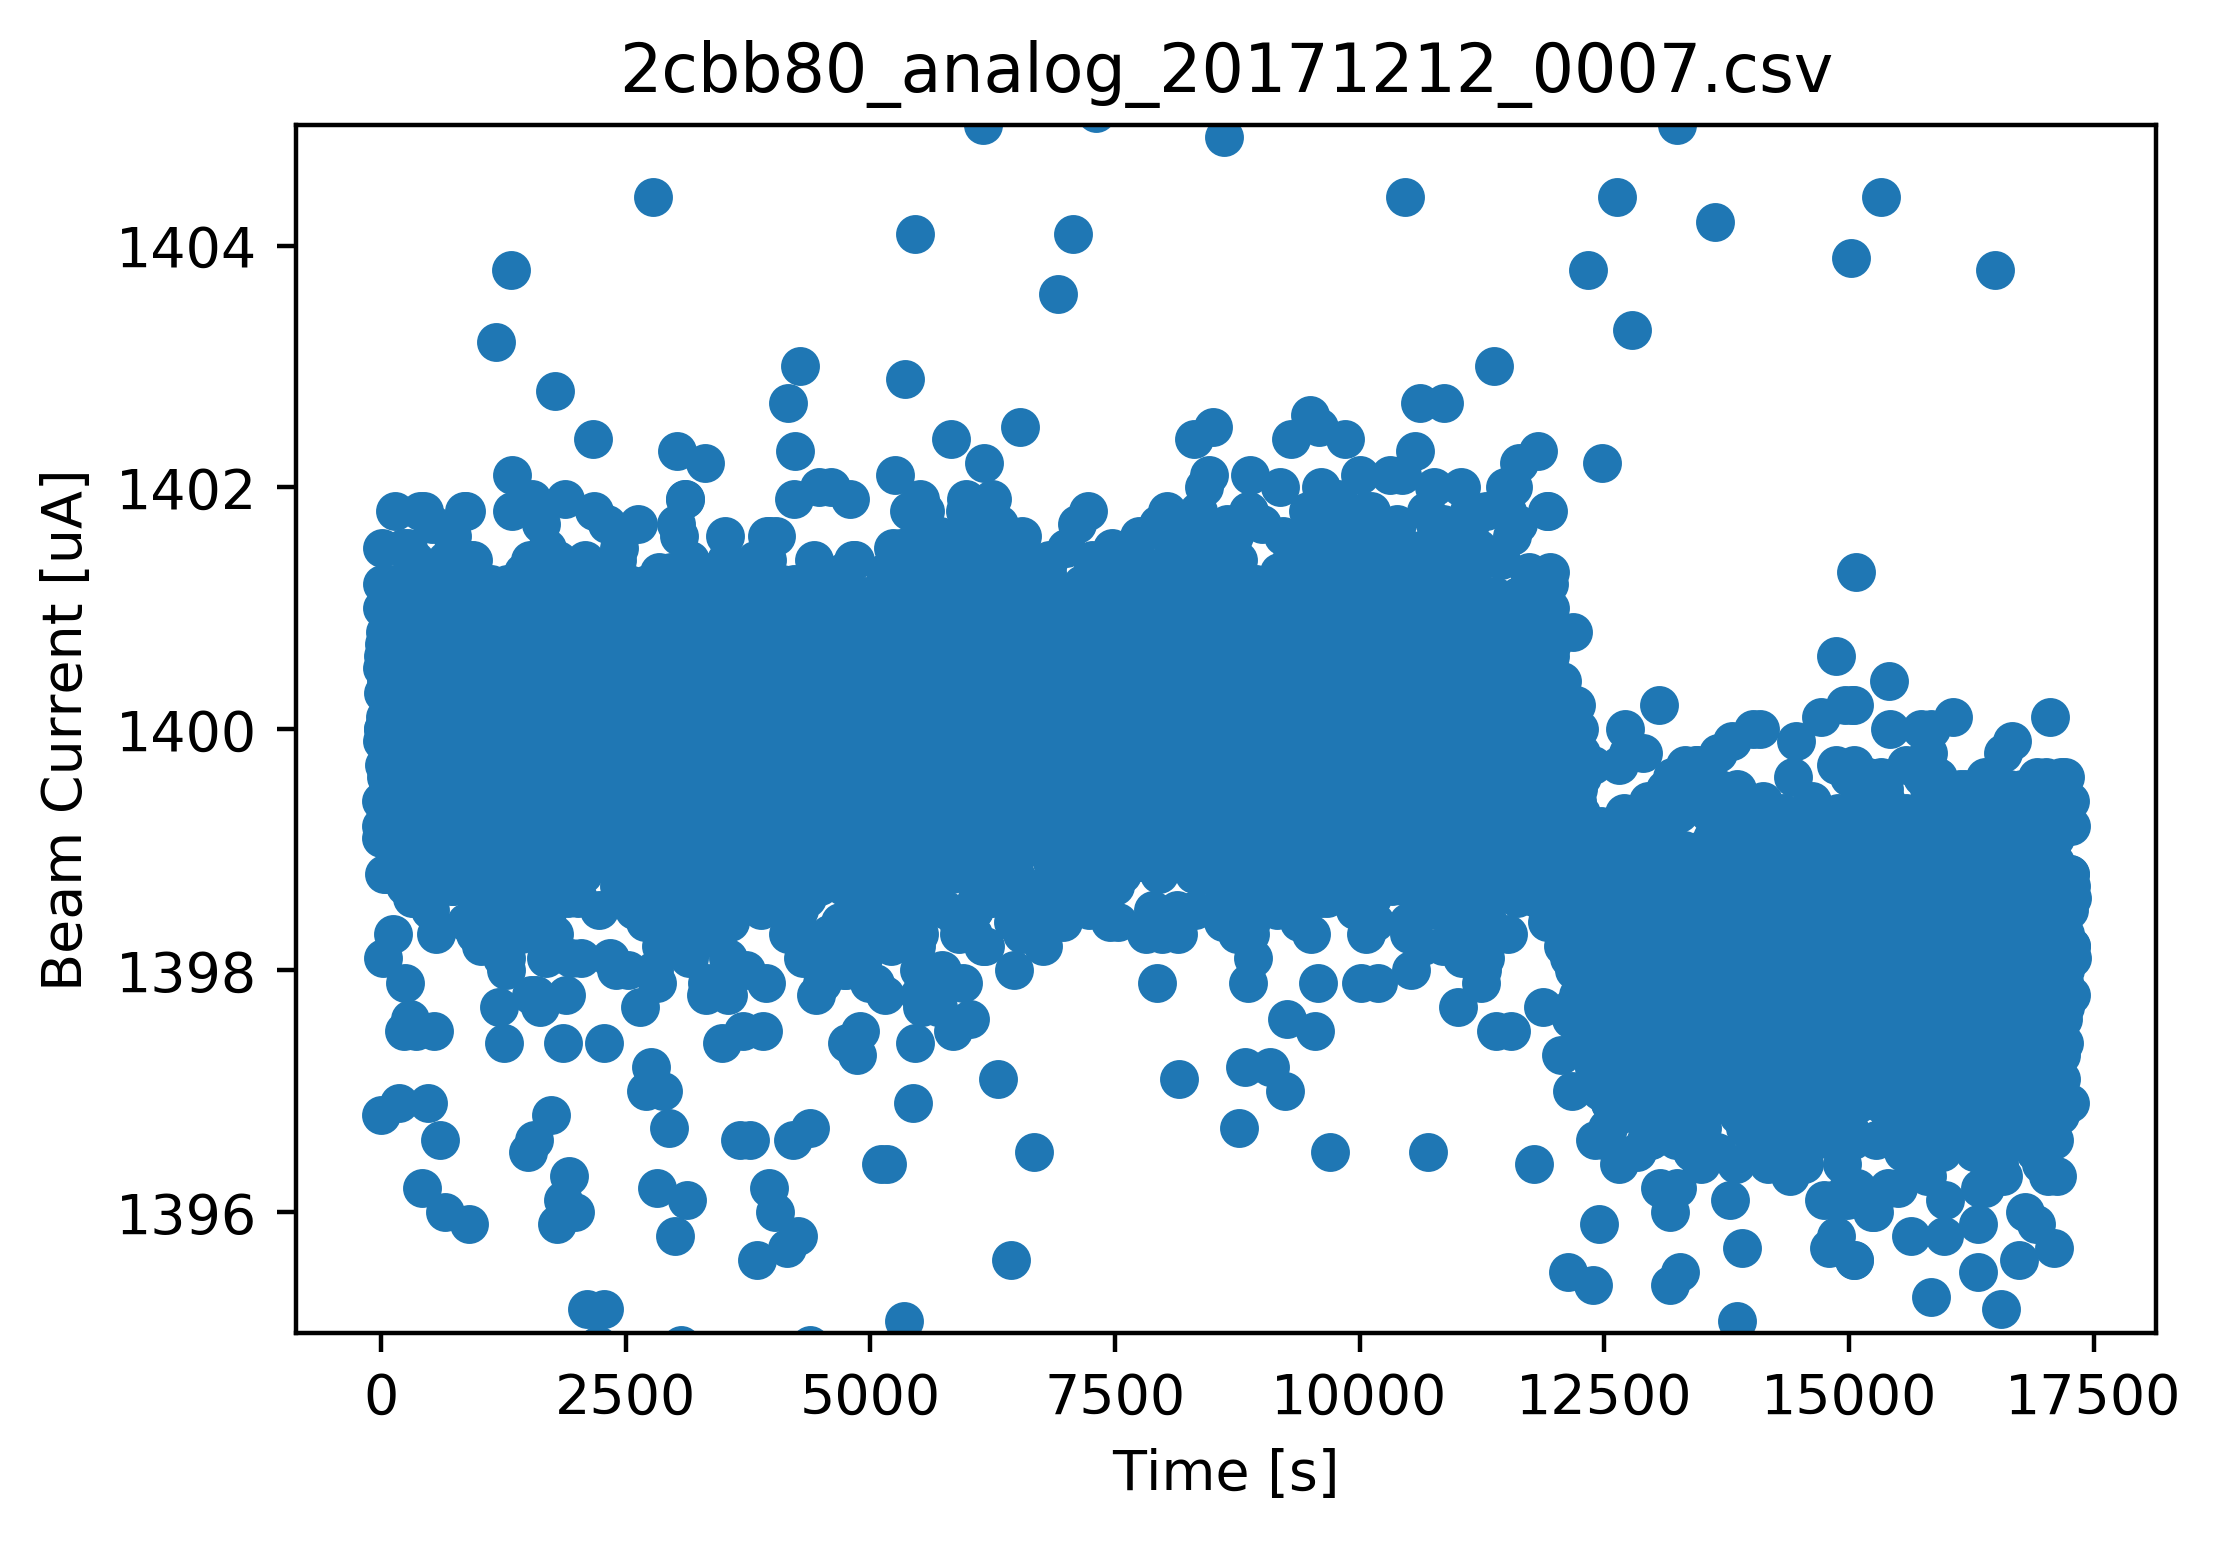

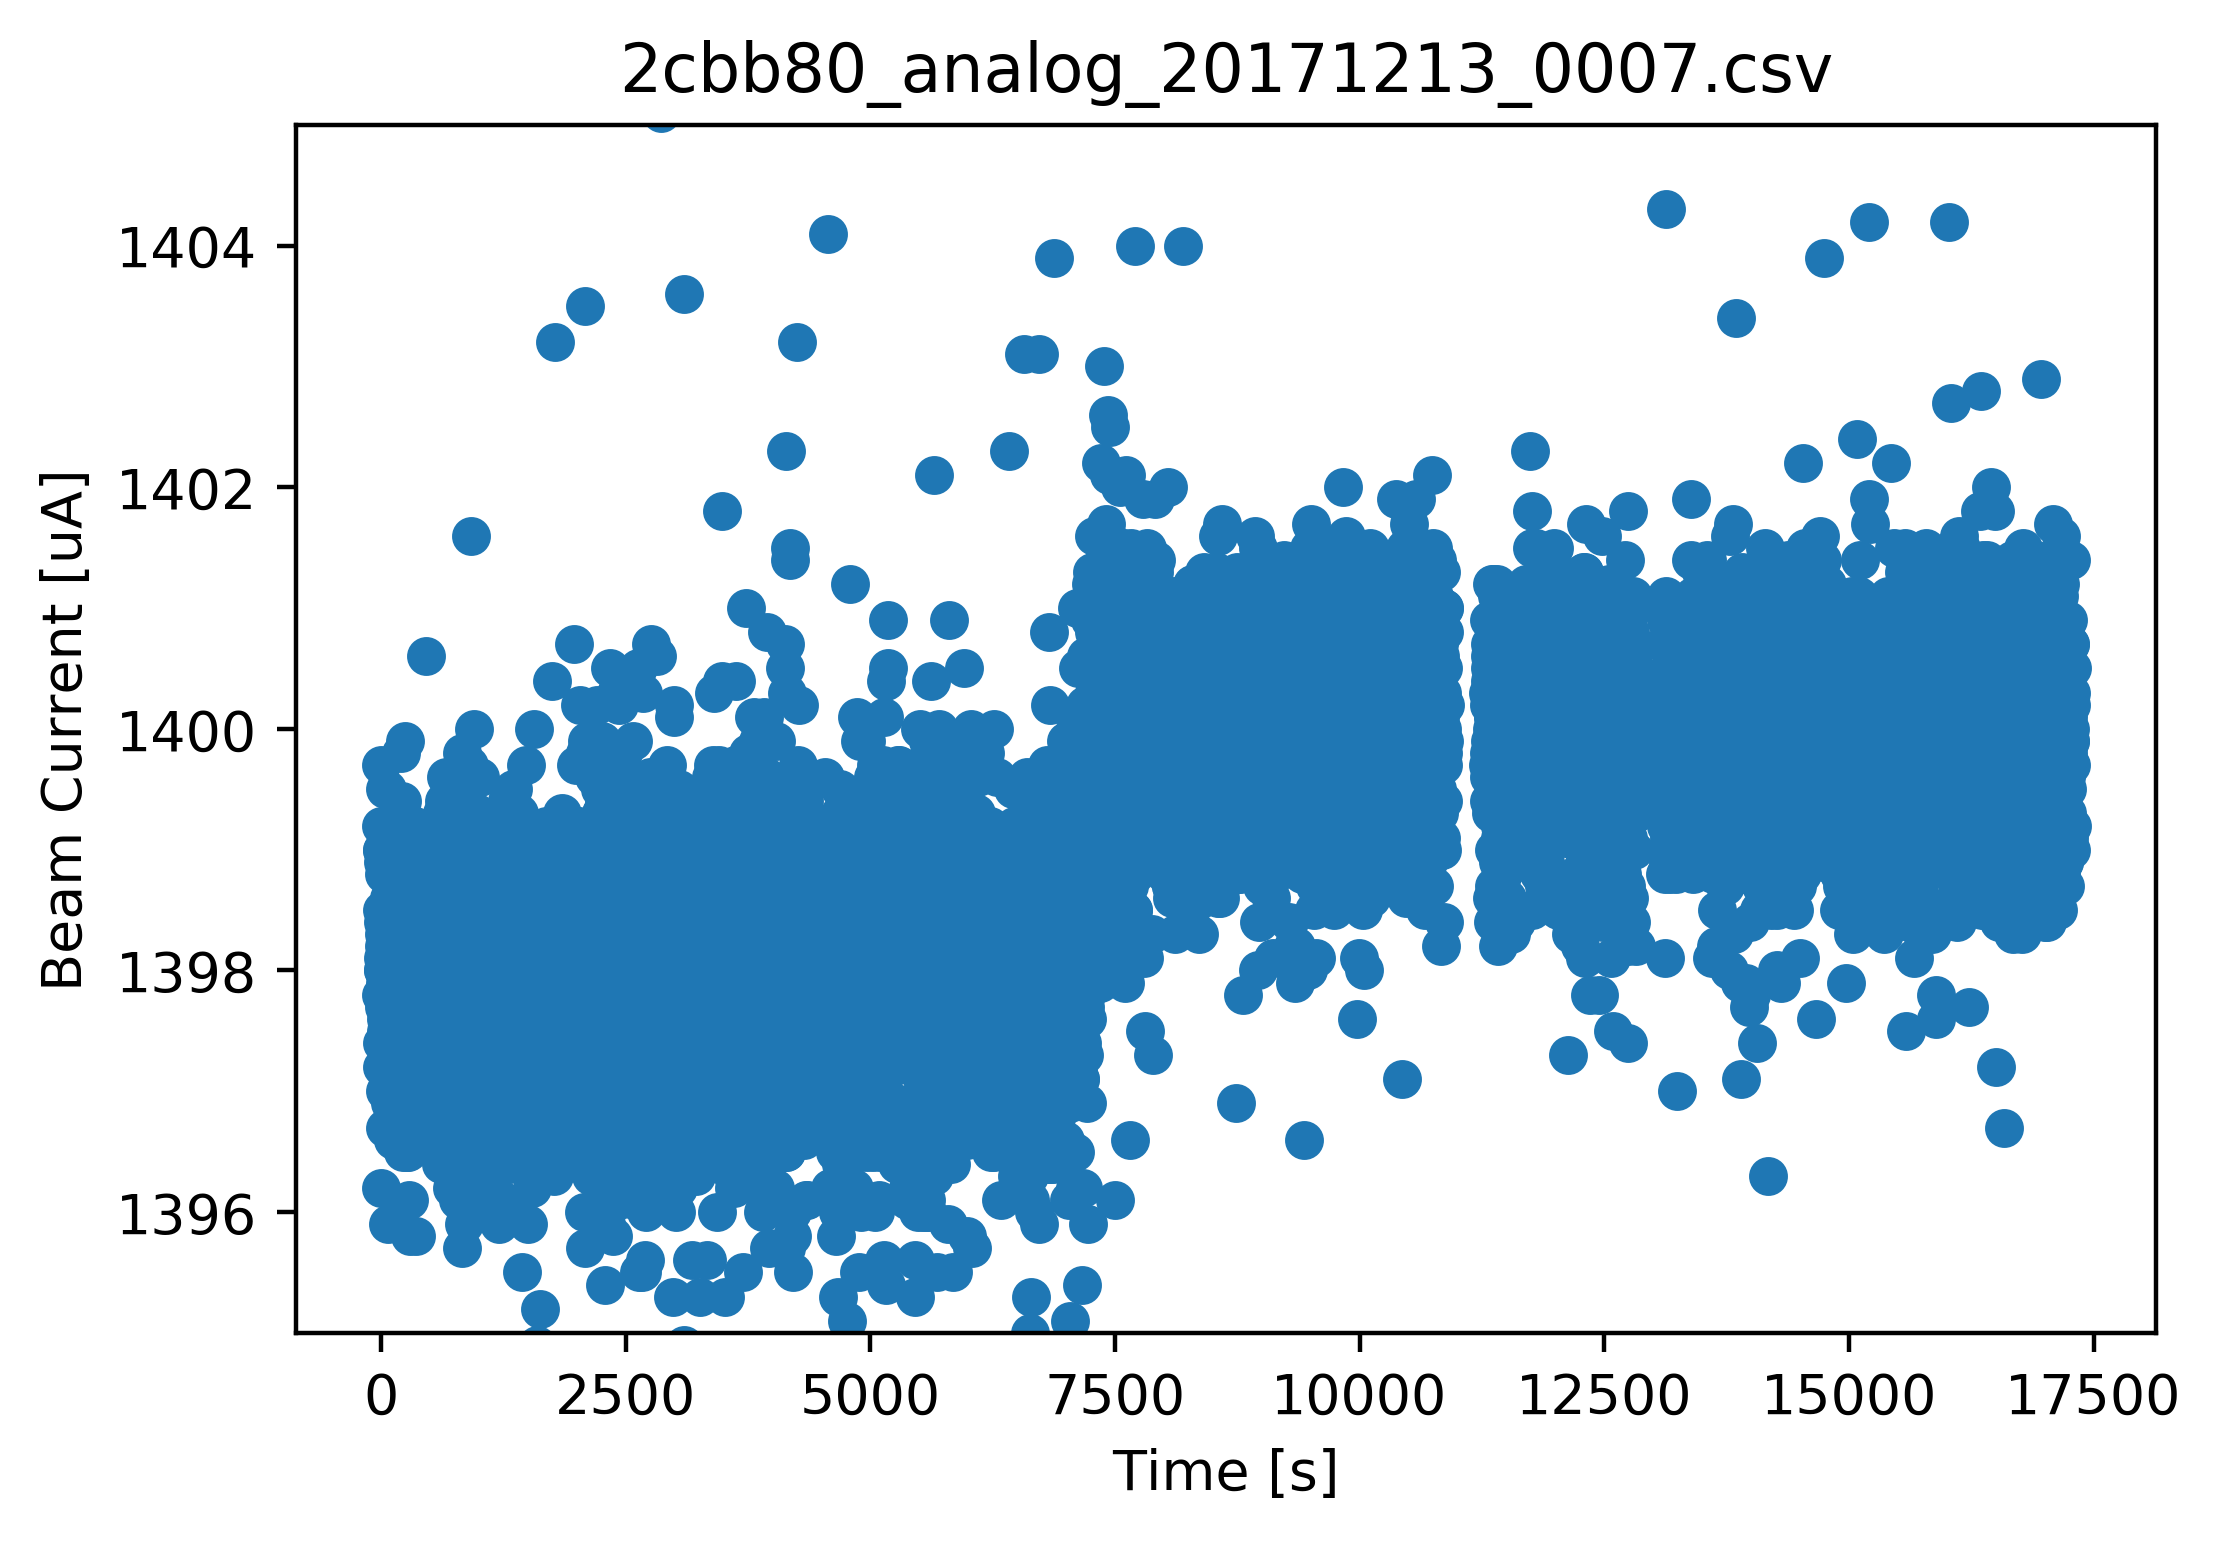

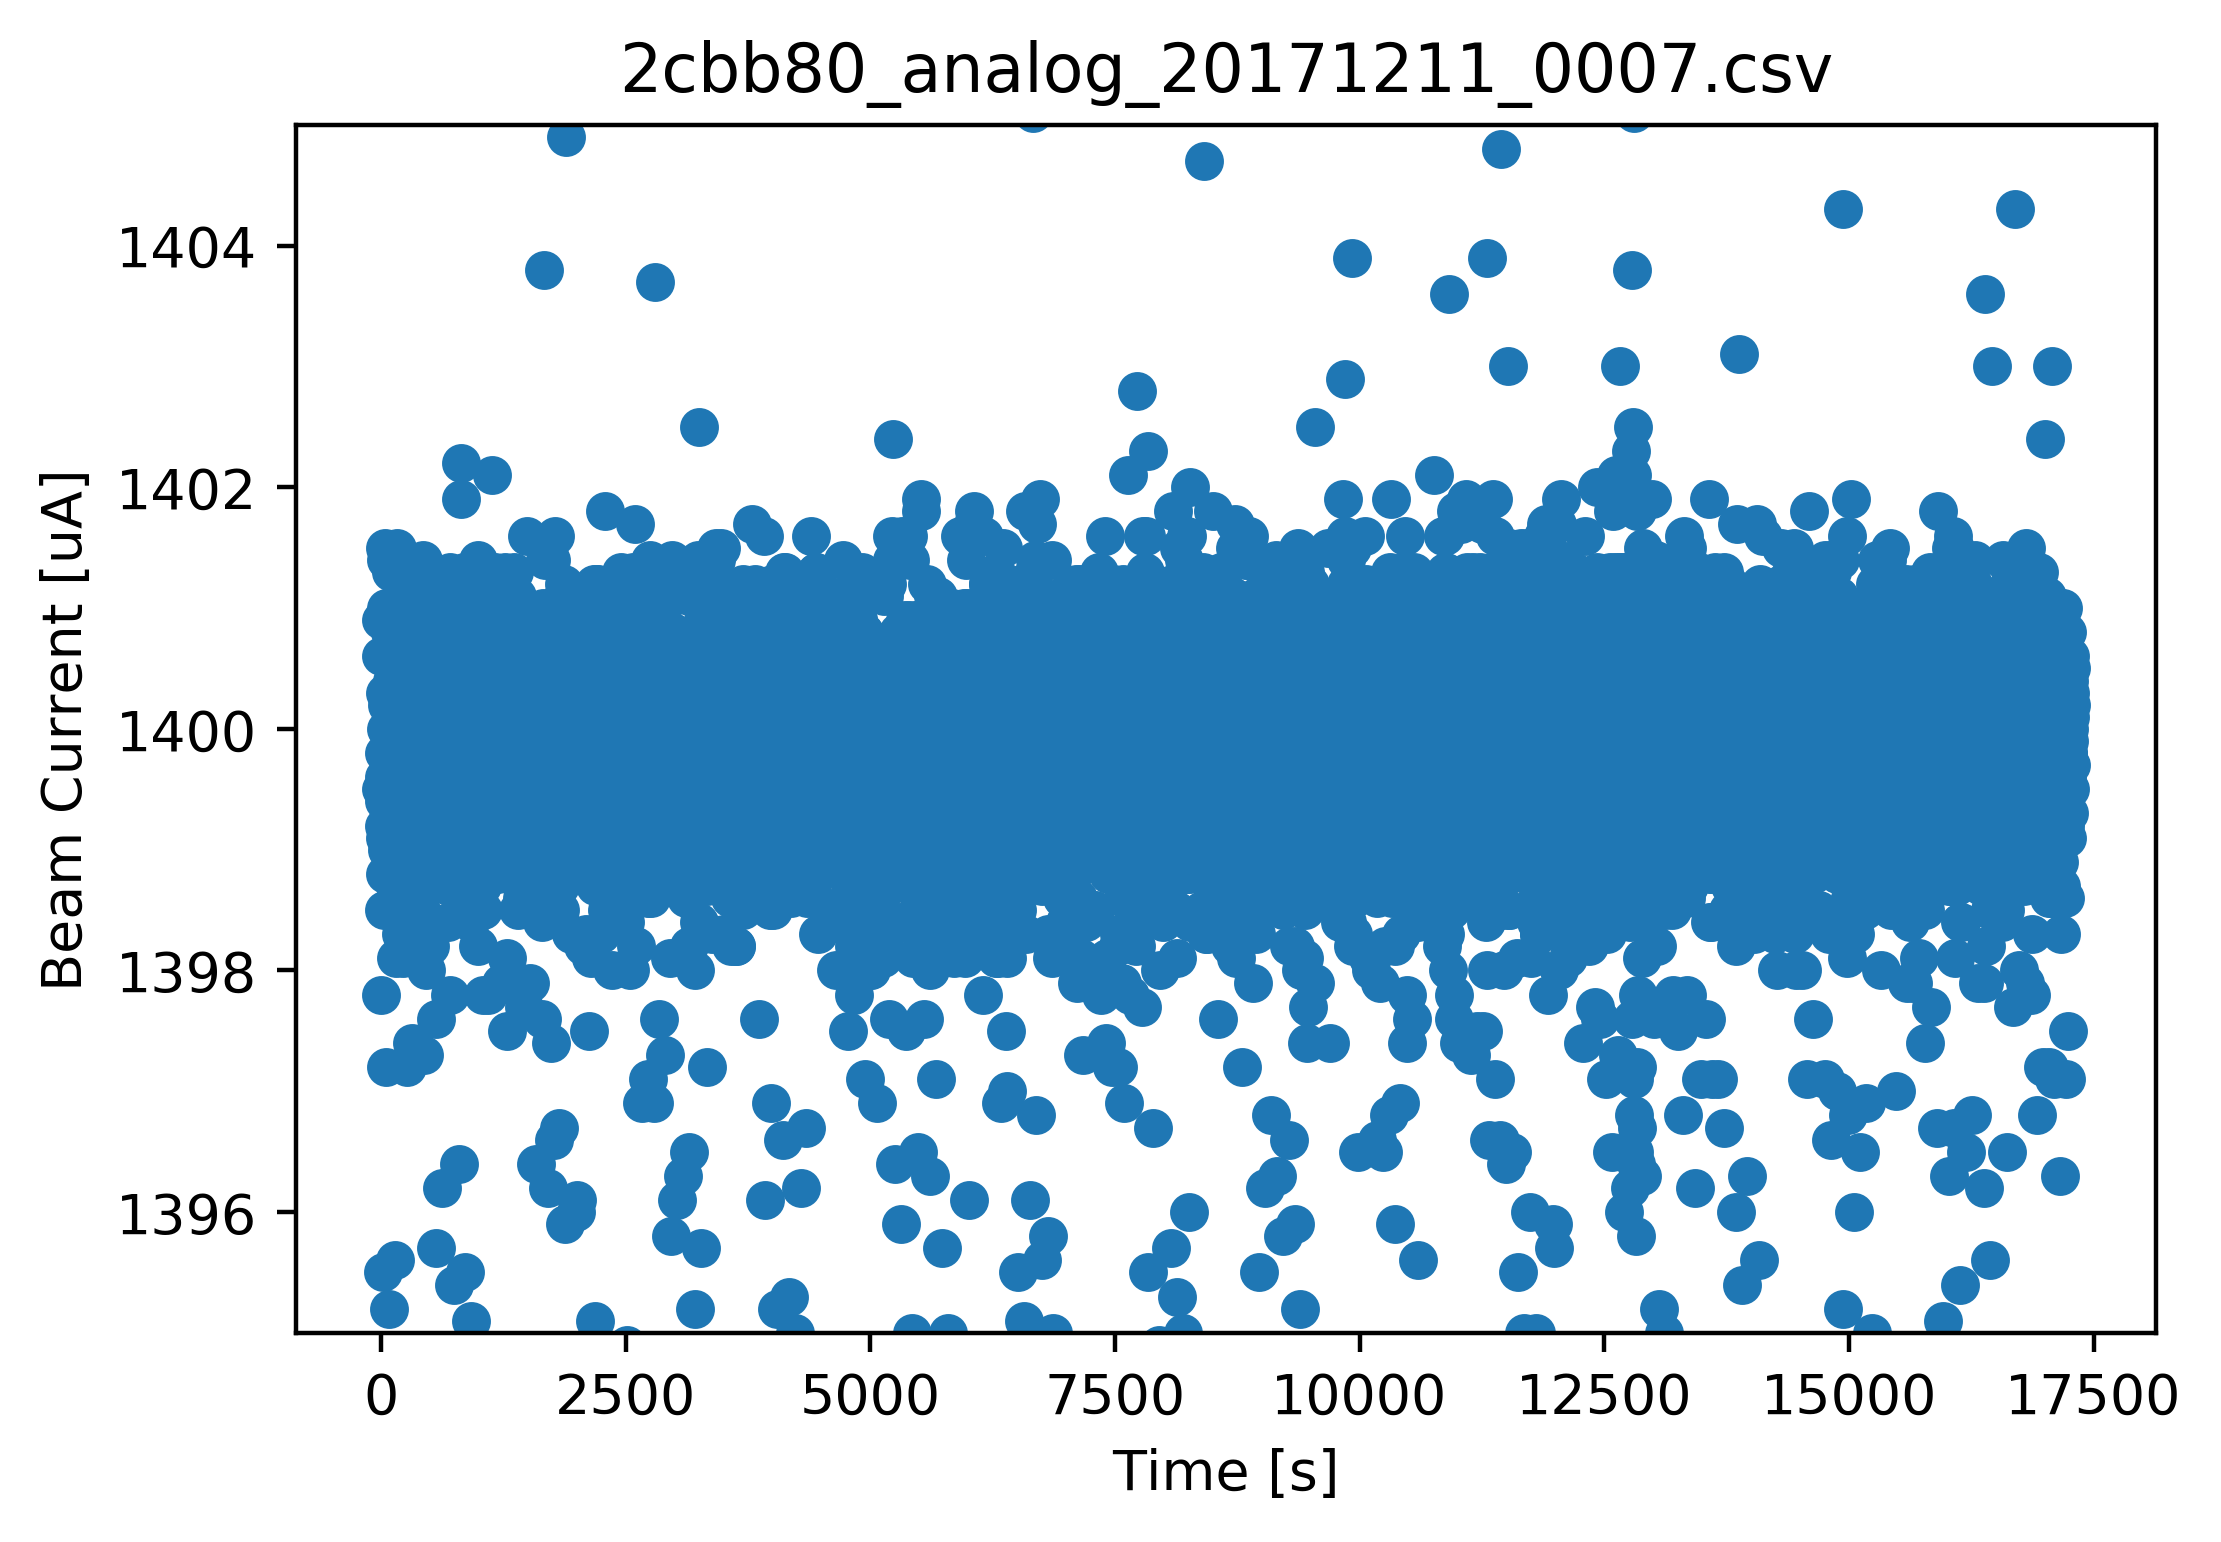

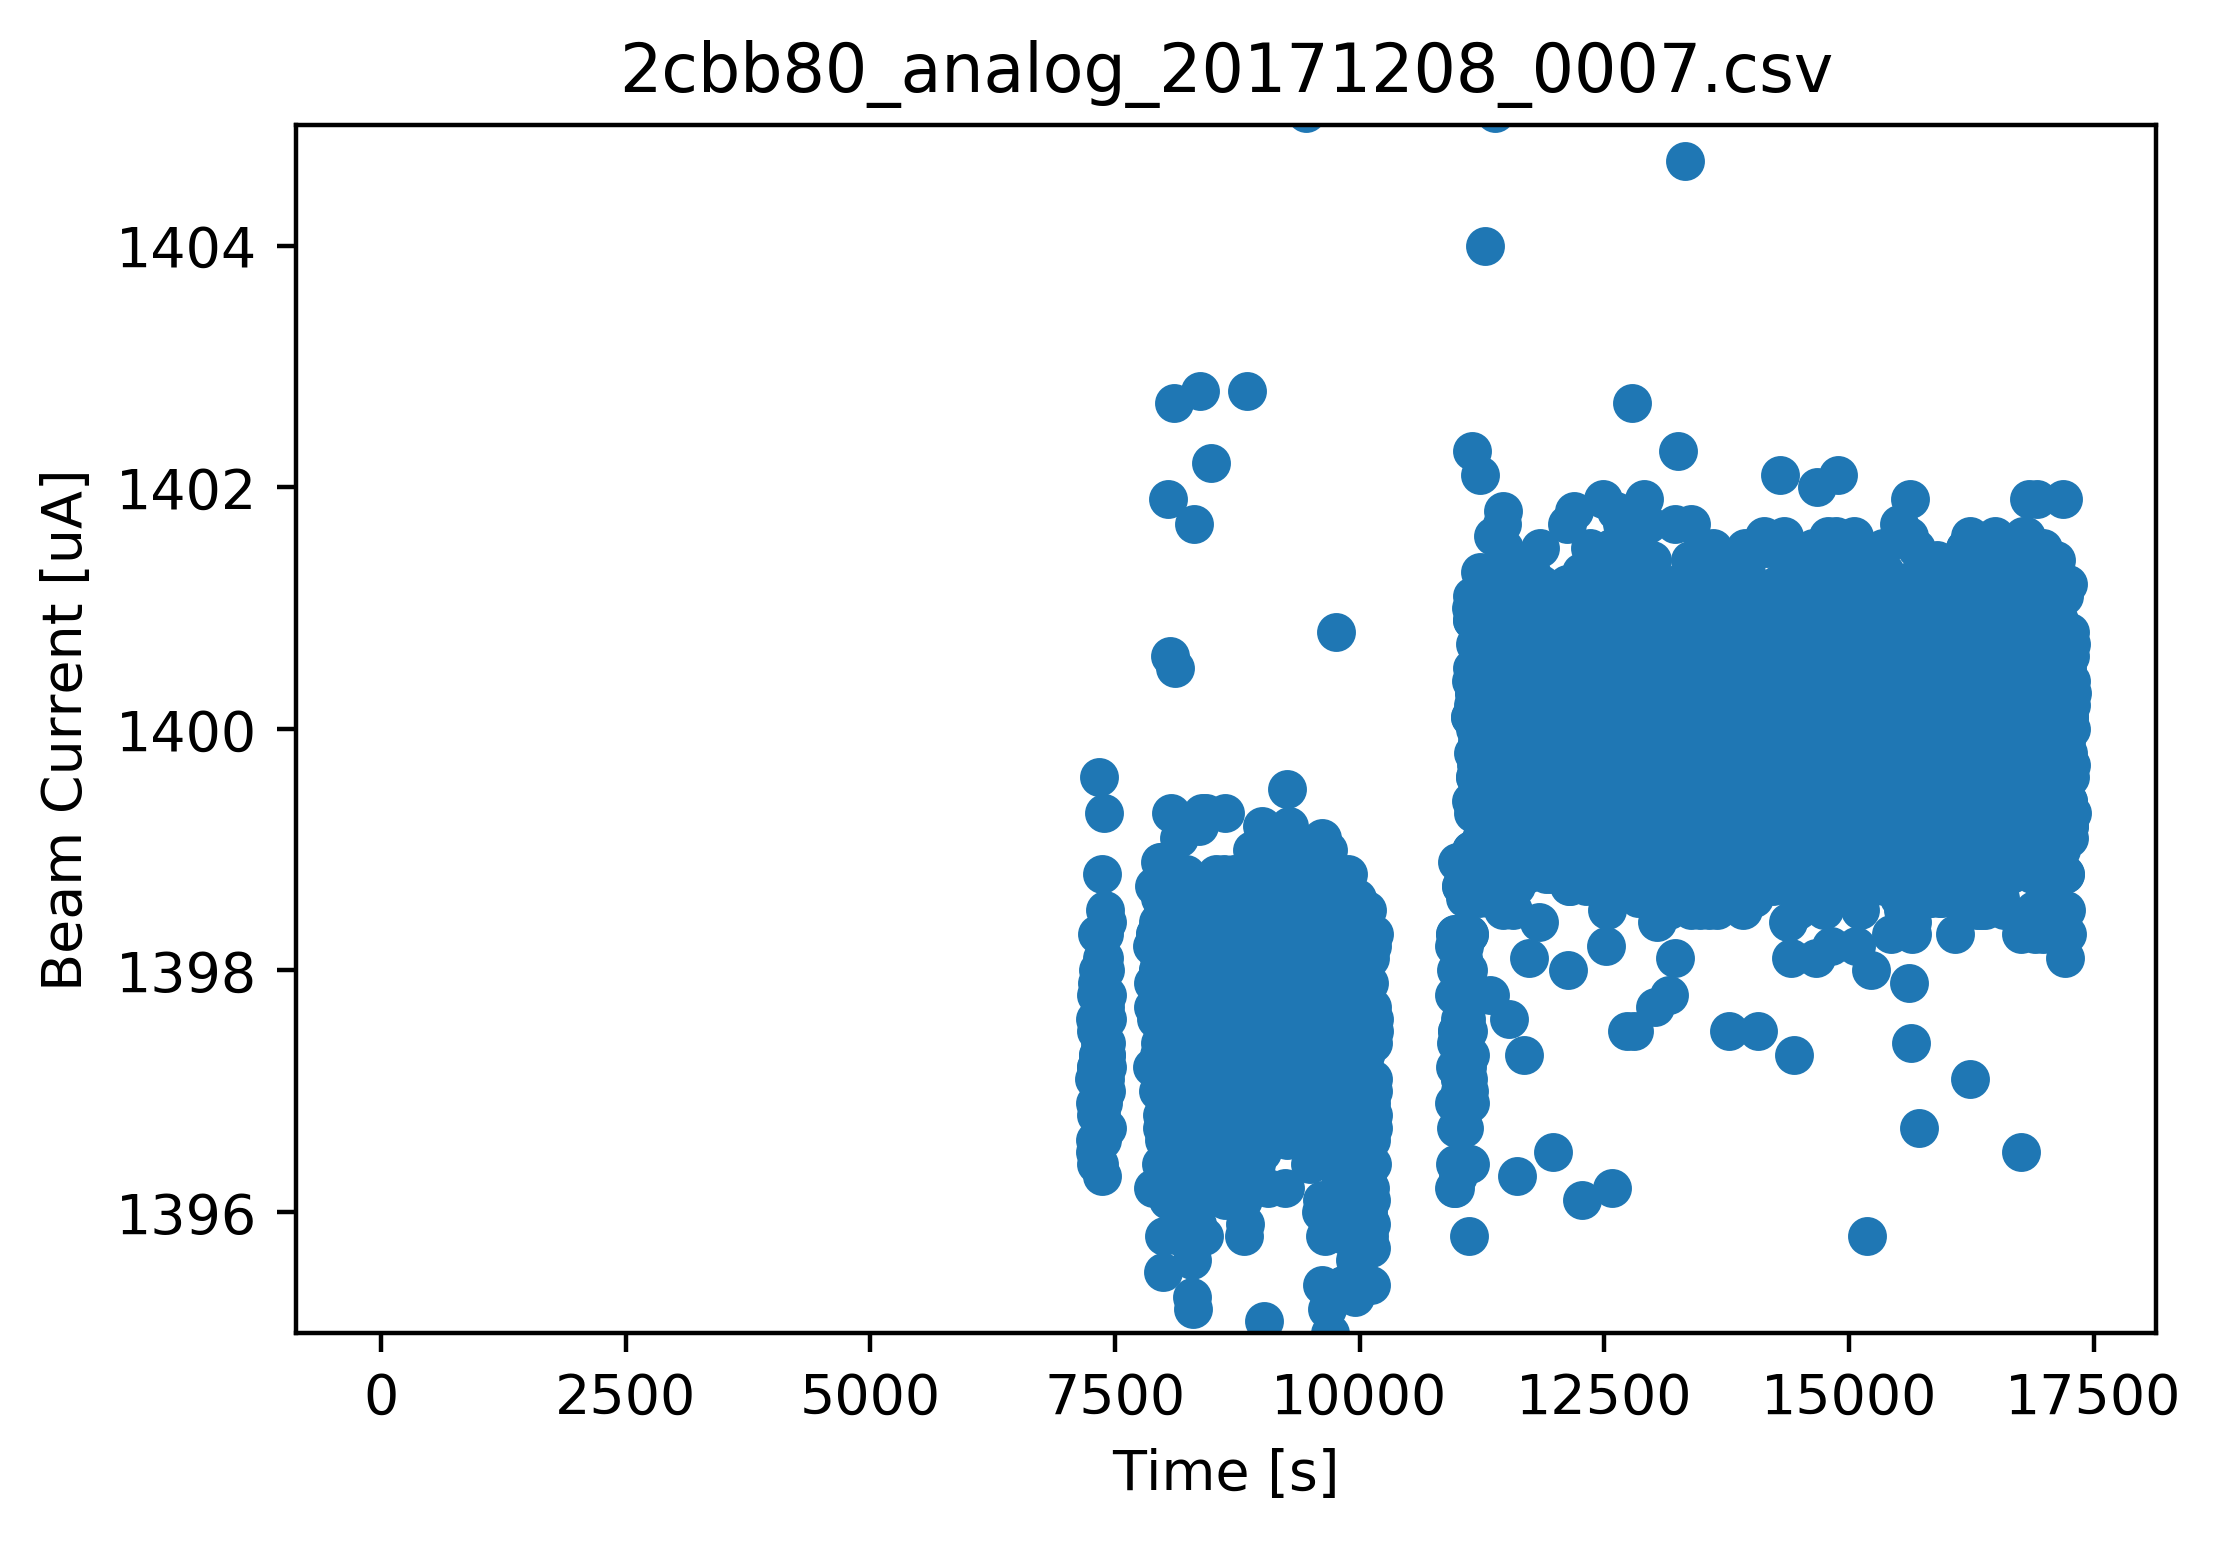

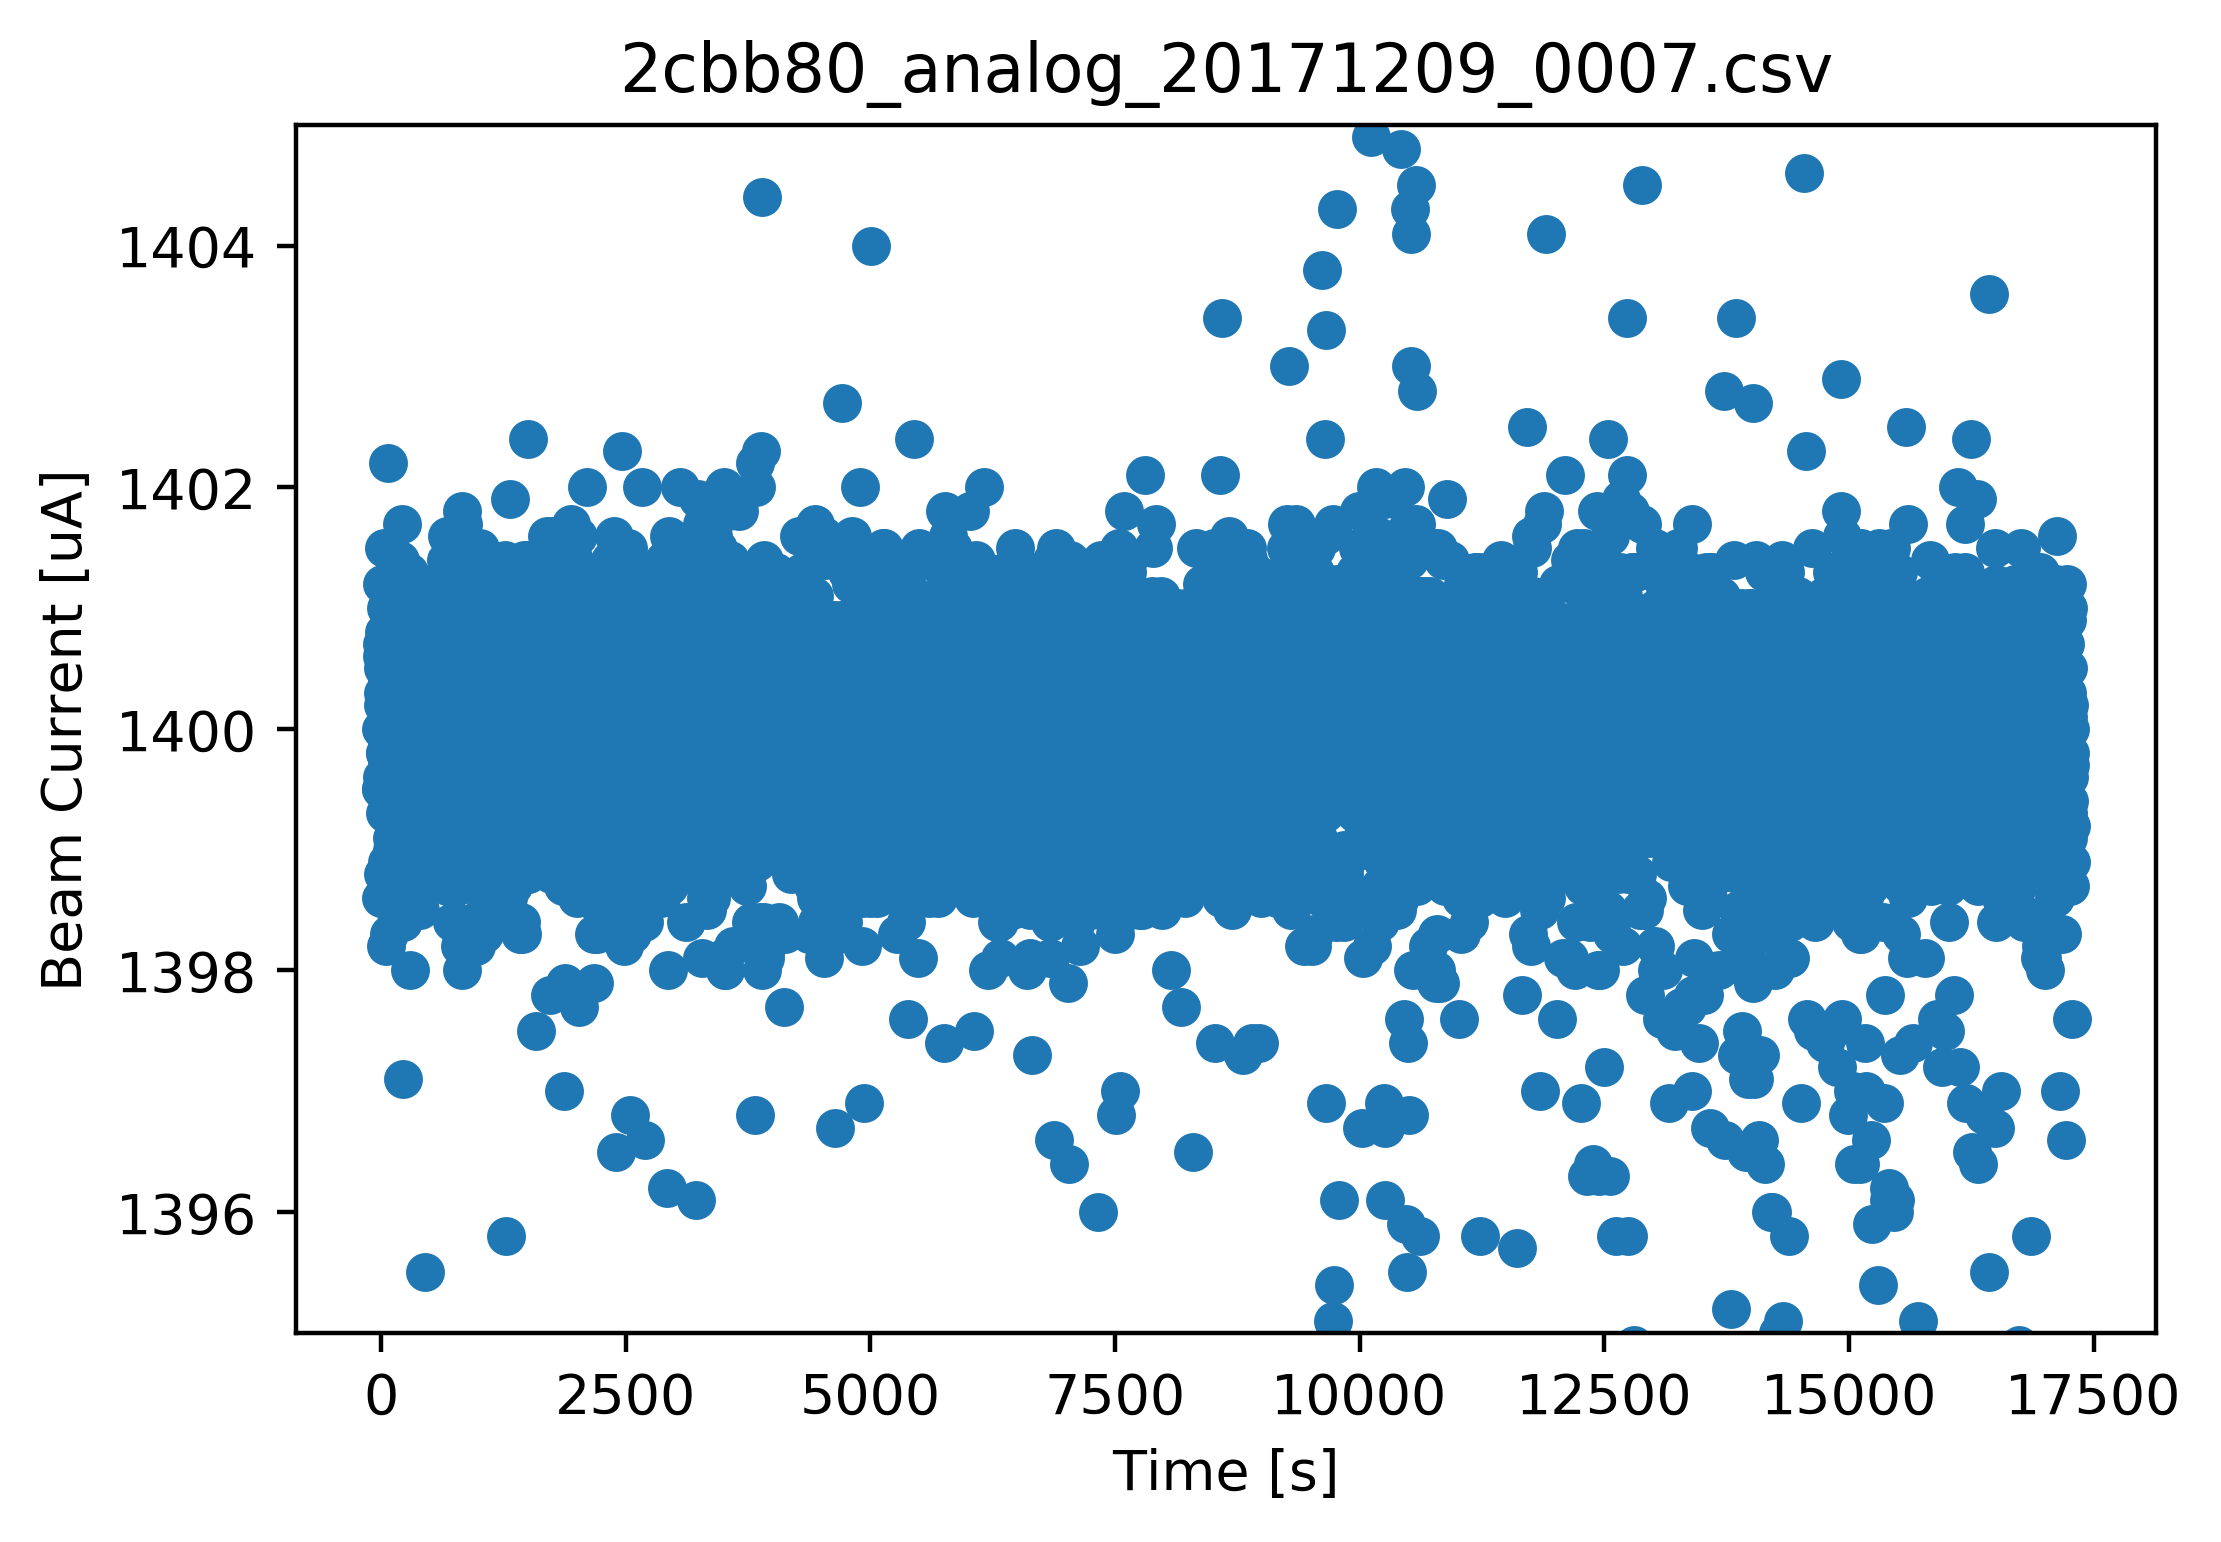

IsADirectoryError: [Errno 21] Is a directory: '../data_p_beam/.ipynb_checkpoints'

In [63]:
# Some of this is half finished because I realized that Bernhard's data has 0.1 Hz 
# frequency whereas Edgard's is 0.5 Hz. I'm not sure how that happens, but I begin 
# looking at Edgard's exclusively in a separate notebook.

# retrieve the epoch time stamp of the beginning of the experiment
exp_start_time = get_first_run_time()

for filename in os.listdir('../data_p_beam'):
    
    data = np.loadtxt('../data_p_beam/' + filename, skiprows=1, delimiter = ';', usecols=(86));
    
    # generate an array of time stamps with reference to experiment start time
    # initialize an empty array to hold time data
    time = np.zeros((np.shape(data)))
    
#     # open and get the lines of the data file as strings
#     f = open('../data_p_beam/' + filename)  
#     lines = f.readlines()
#     f.close()
    
#     # loop through and get each time stamp
#     # the 0th line is ignored
#     for i in range(1, np.shape(data)[0]):
        
#         # get time_stamp from lines
#         date_time = lines[i][0:10] + ' ' + lines[i][14:23]
#         print(date_time)
#         pattern = '%d.%m.%Y %H:%M:%S'
#         time_stamp = int(time.mktime(time.strptime(date_time, pattern)))
#         print(time_stamp)

    time = np.zeros((np.shape(data)))
    for i in range (0,np.shape(data)[0]):
        
        time[i] = i*2

    plt.clf()
    plt.scatter(time, data);
    plt.xlabel('Time [s]');
    plt.ylabel('Beam Current [uA]');
    plt.title(filename)
    plt.ylim([1395,1405])
    plt.show()

## Pulse Timing Data

As per Bernhard's instructions:

>2RGQ00CE006   -  this is the proton beam current towards UCN - you can see when pulses appeared<br/>
but you cannot trust the absolute value for various reasons - so do notu se as monitoring detector

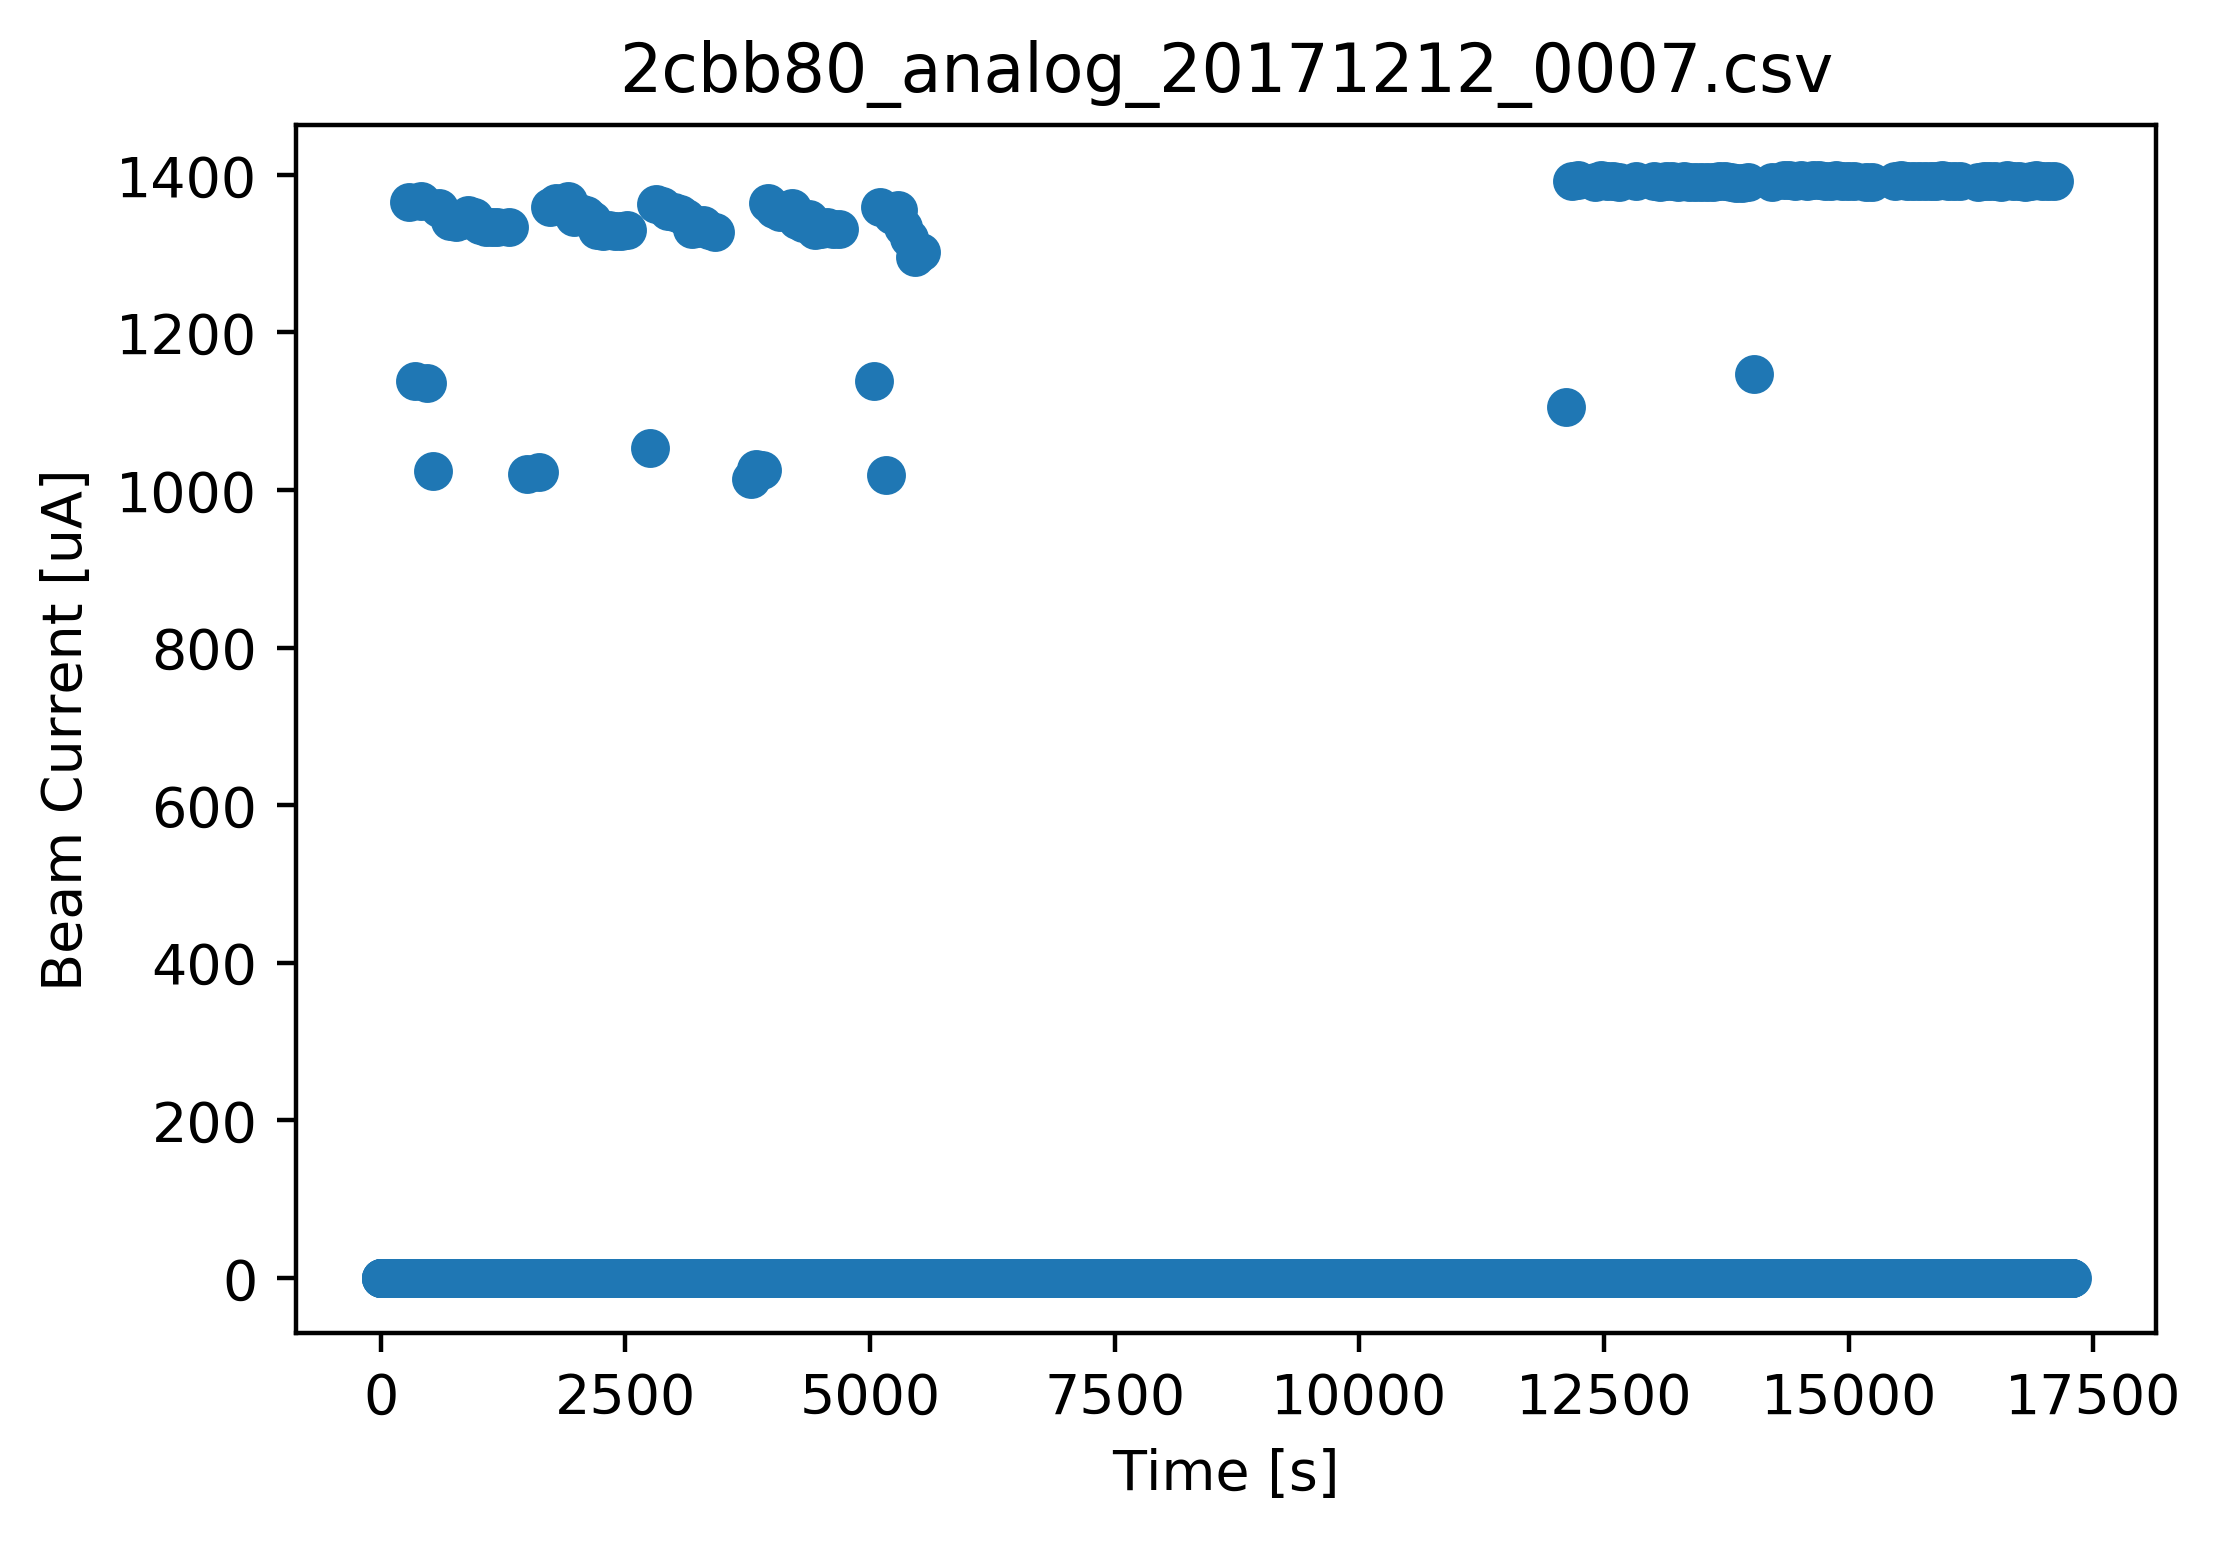

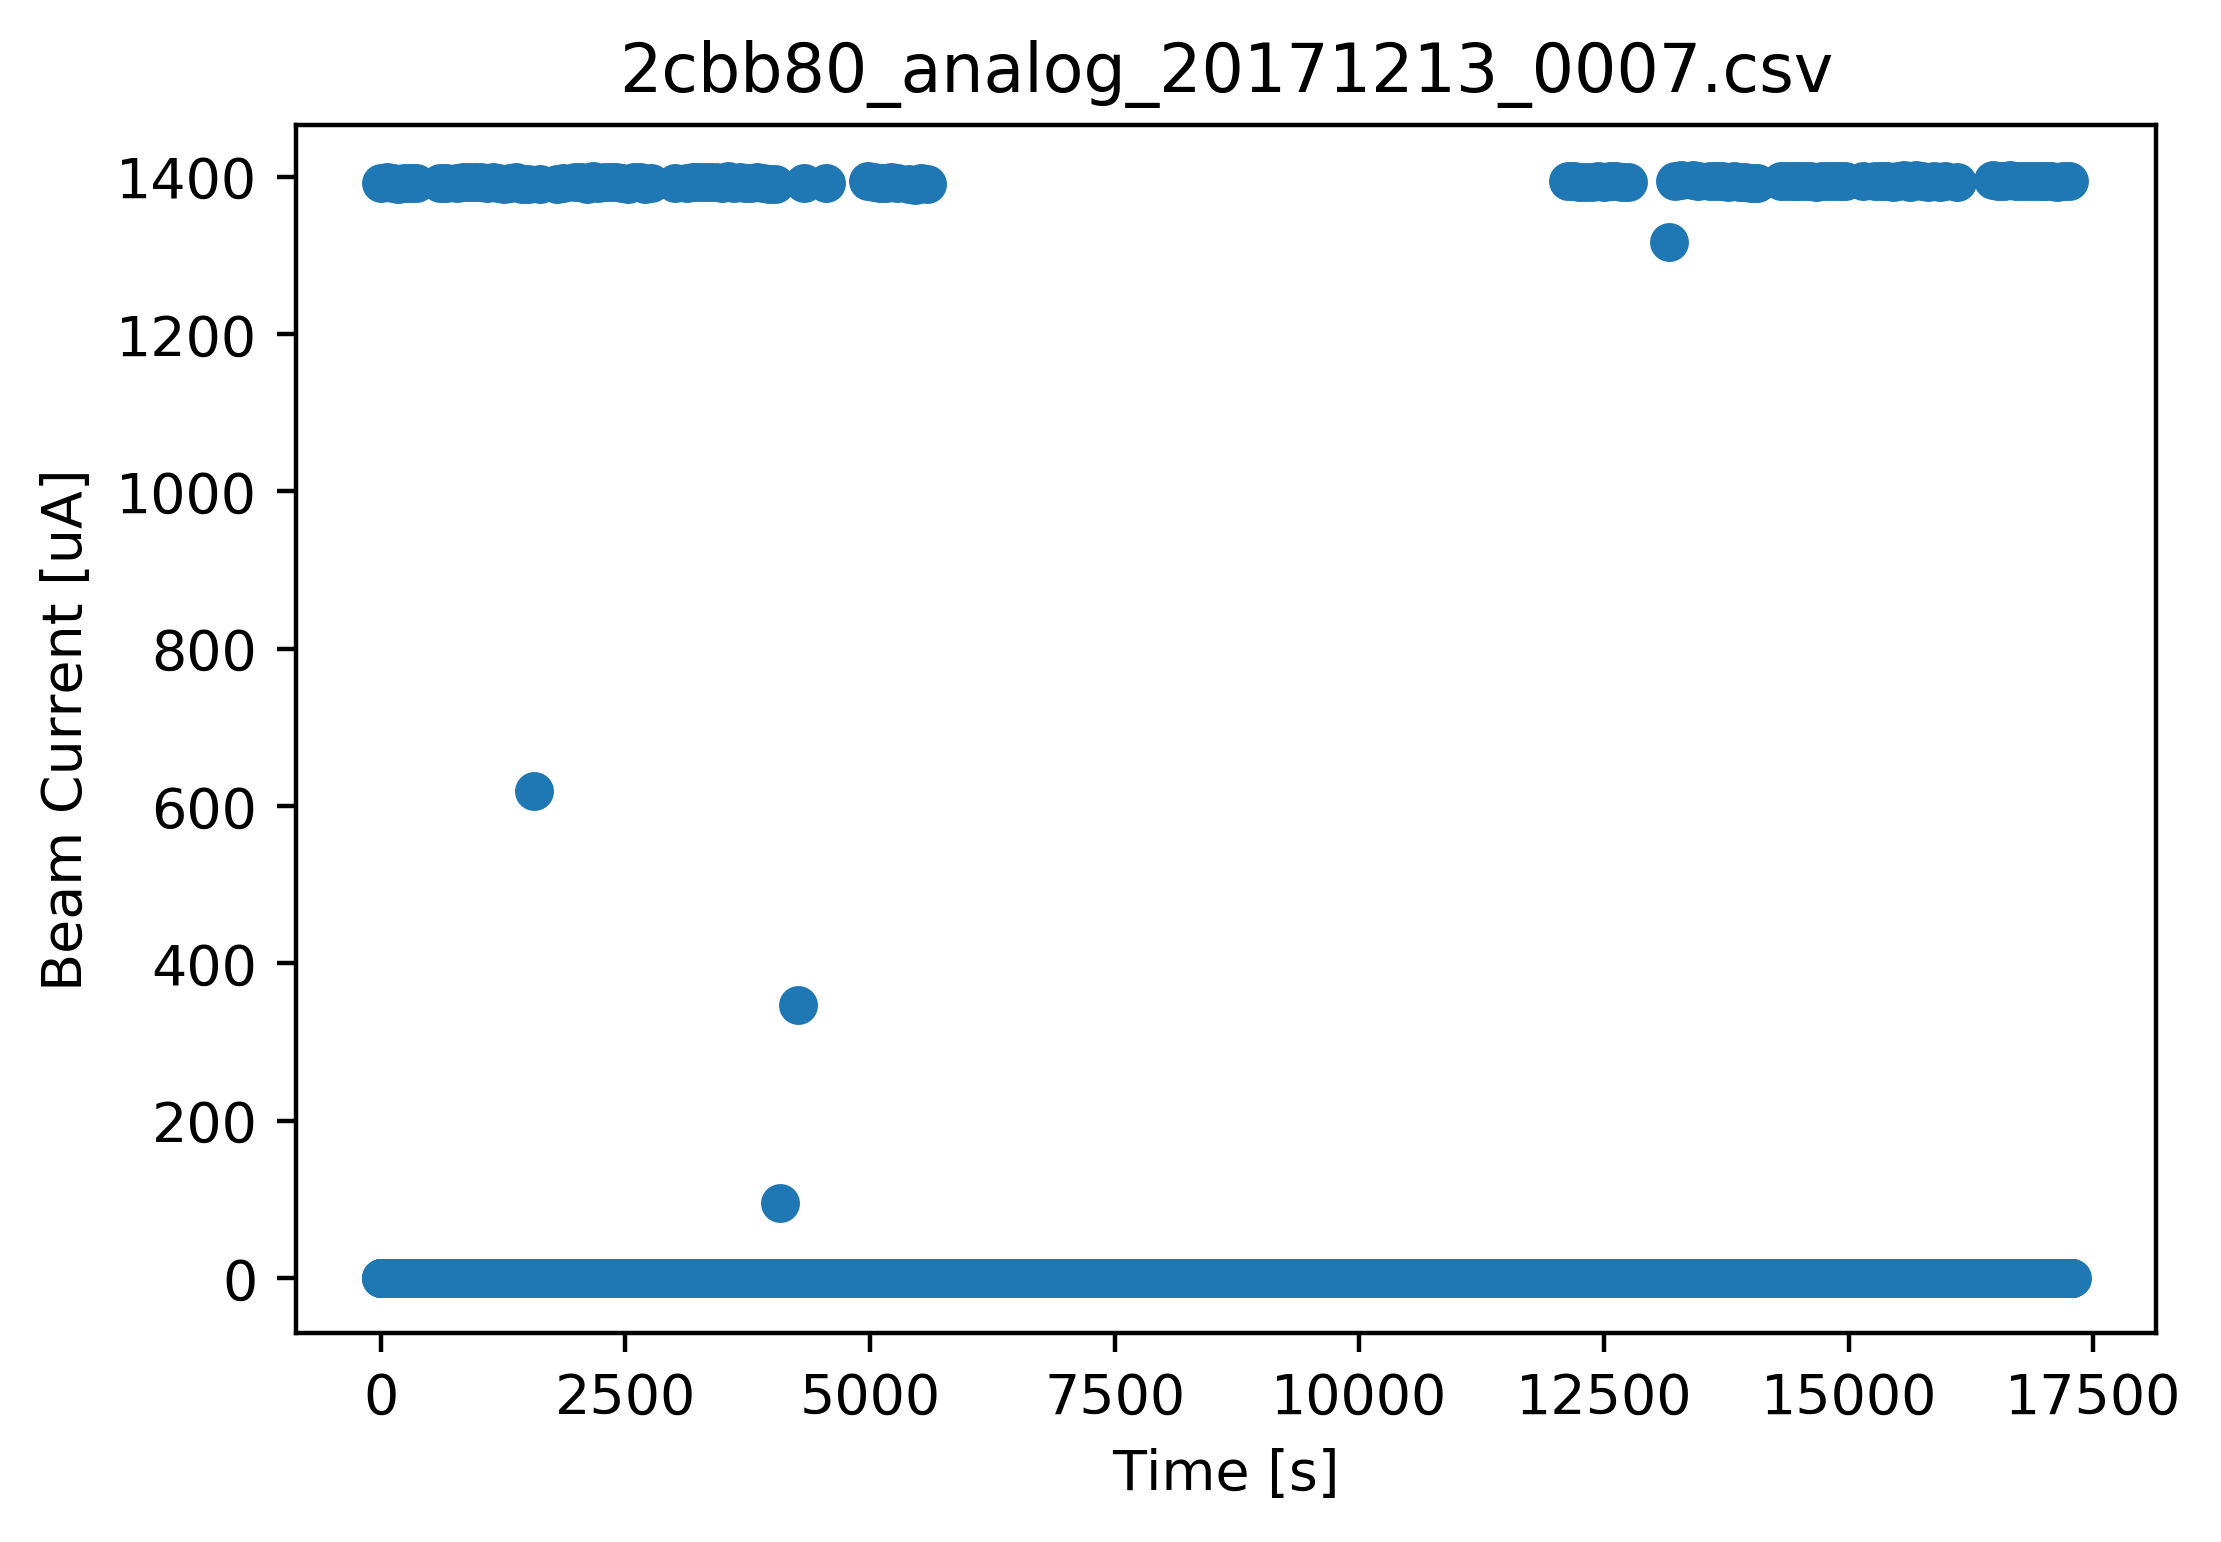

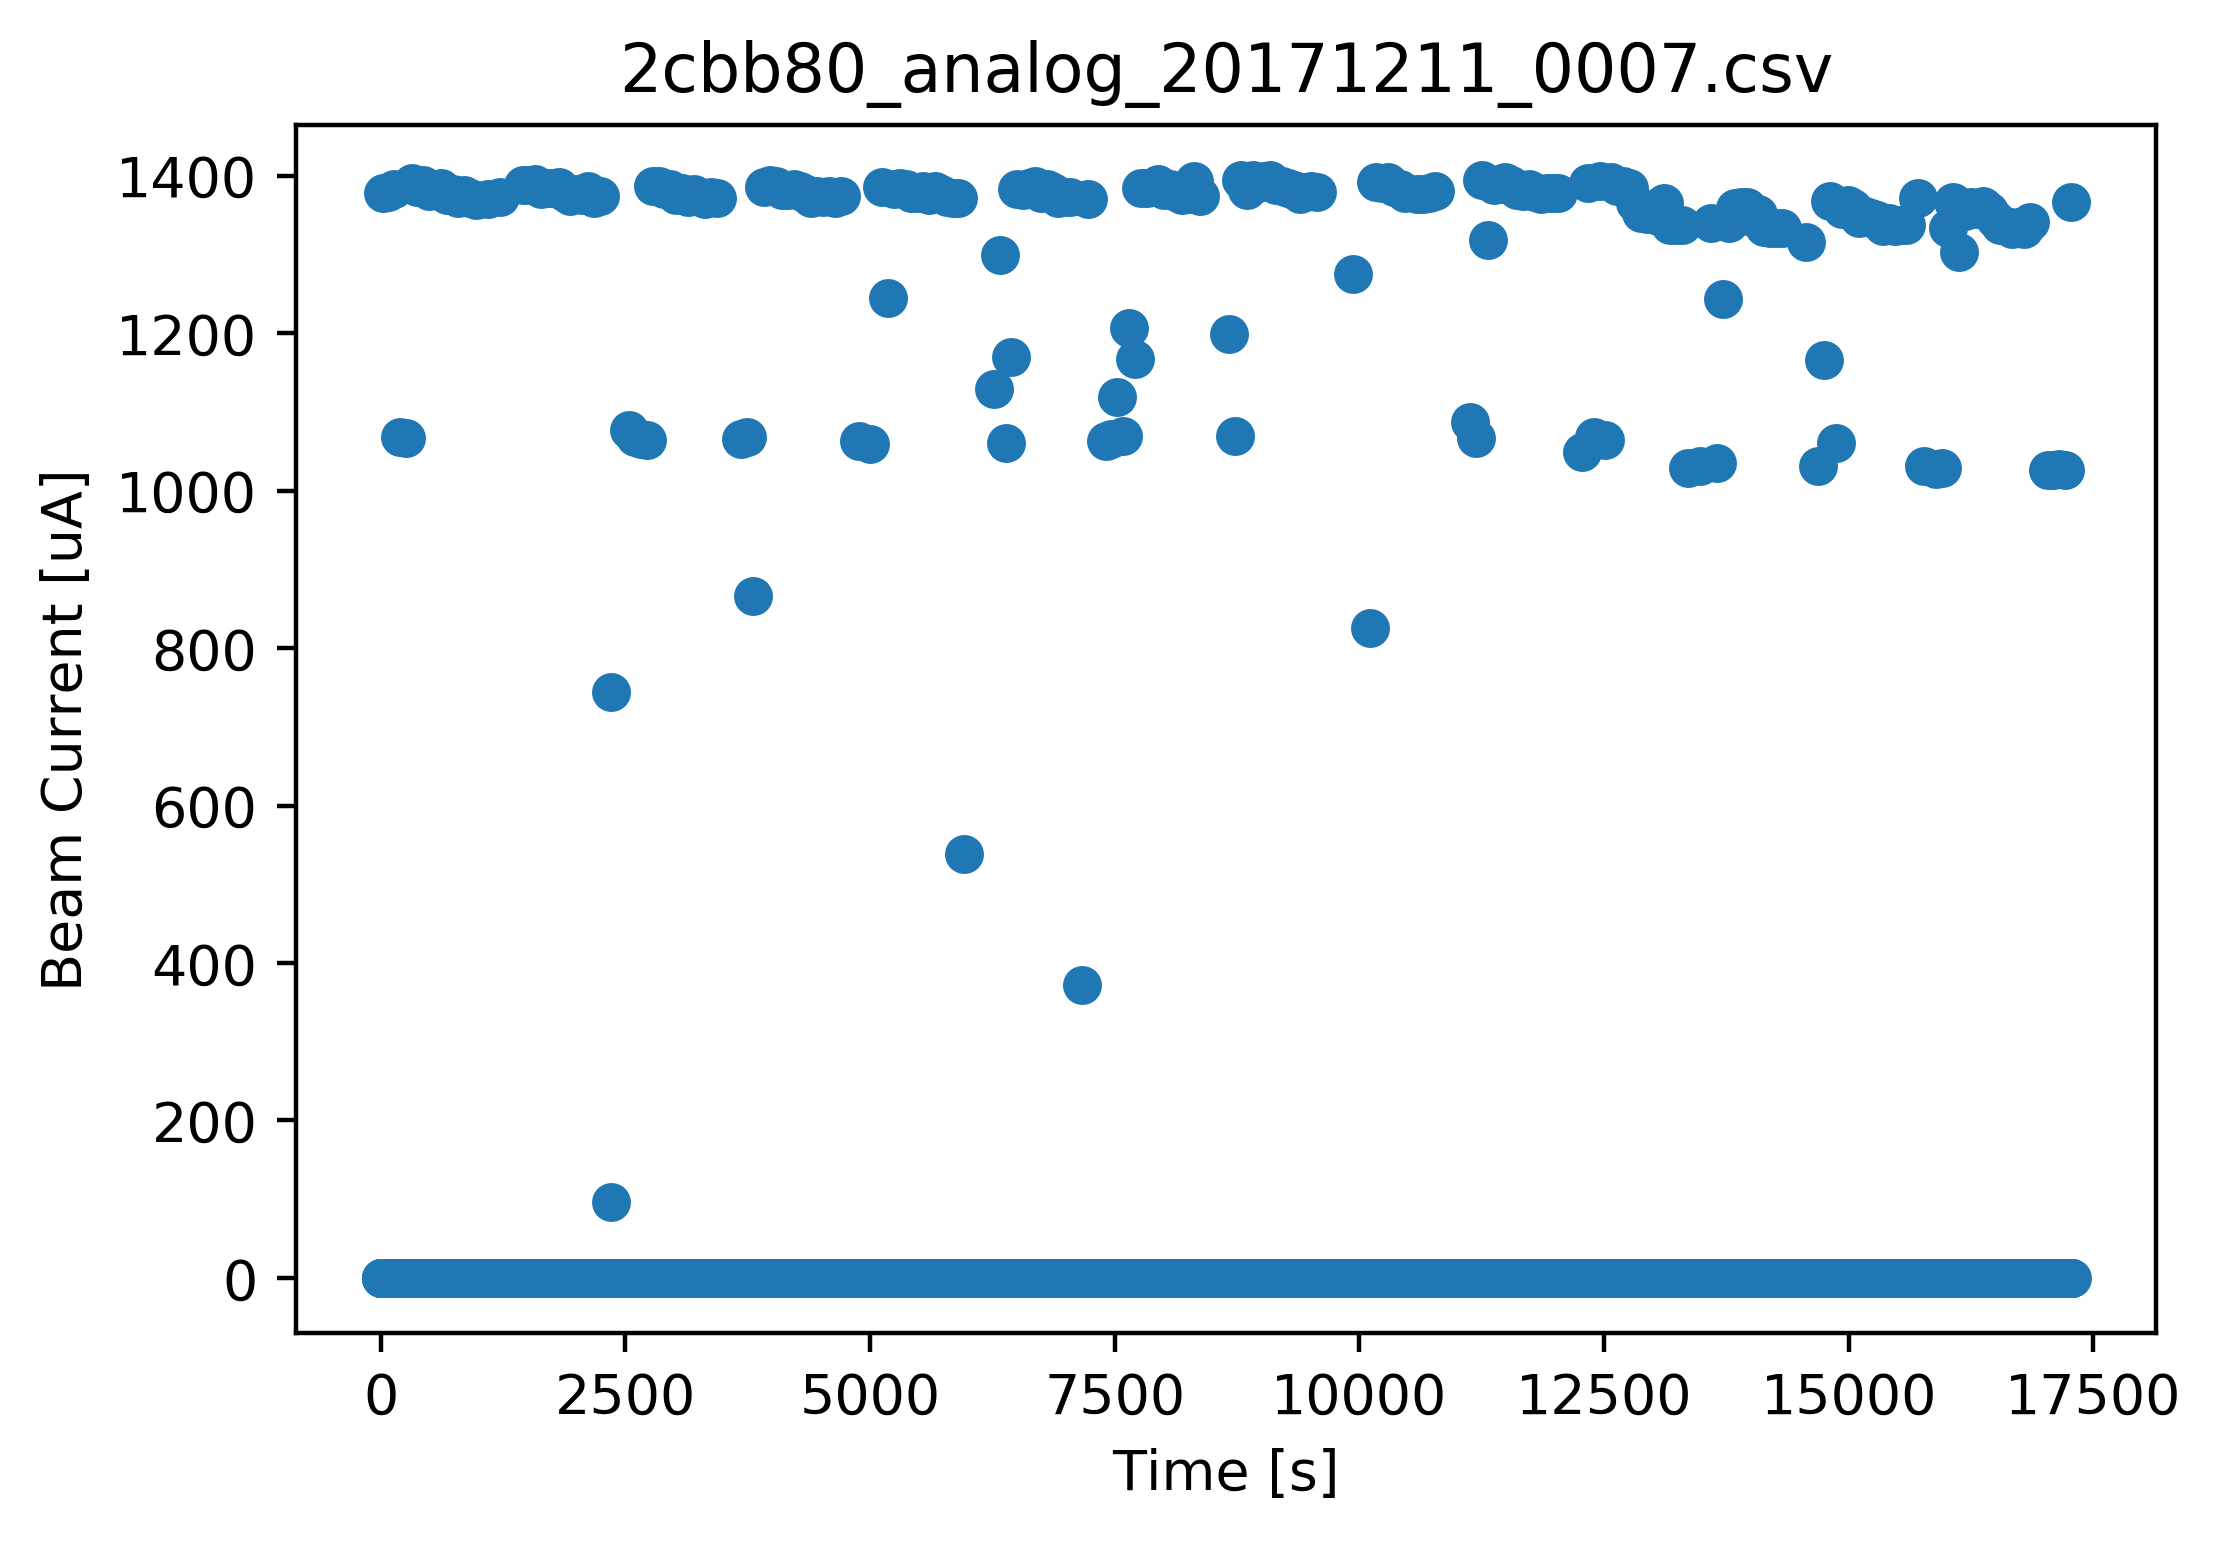

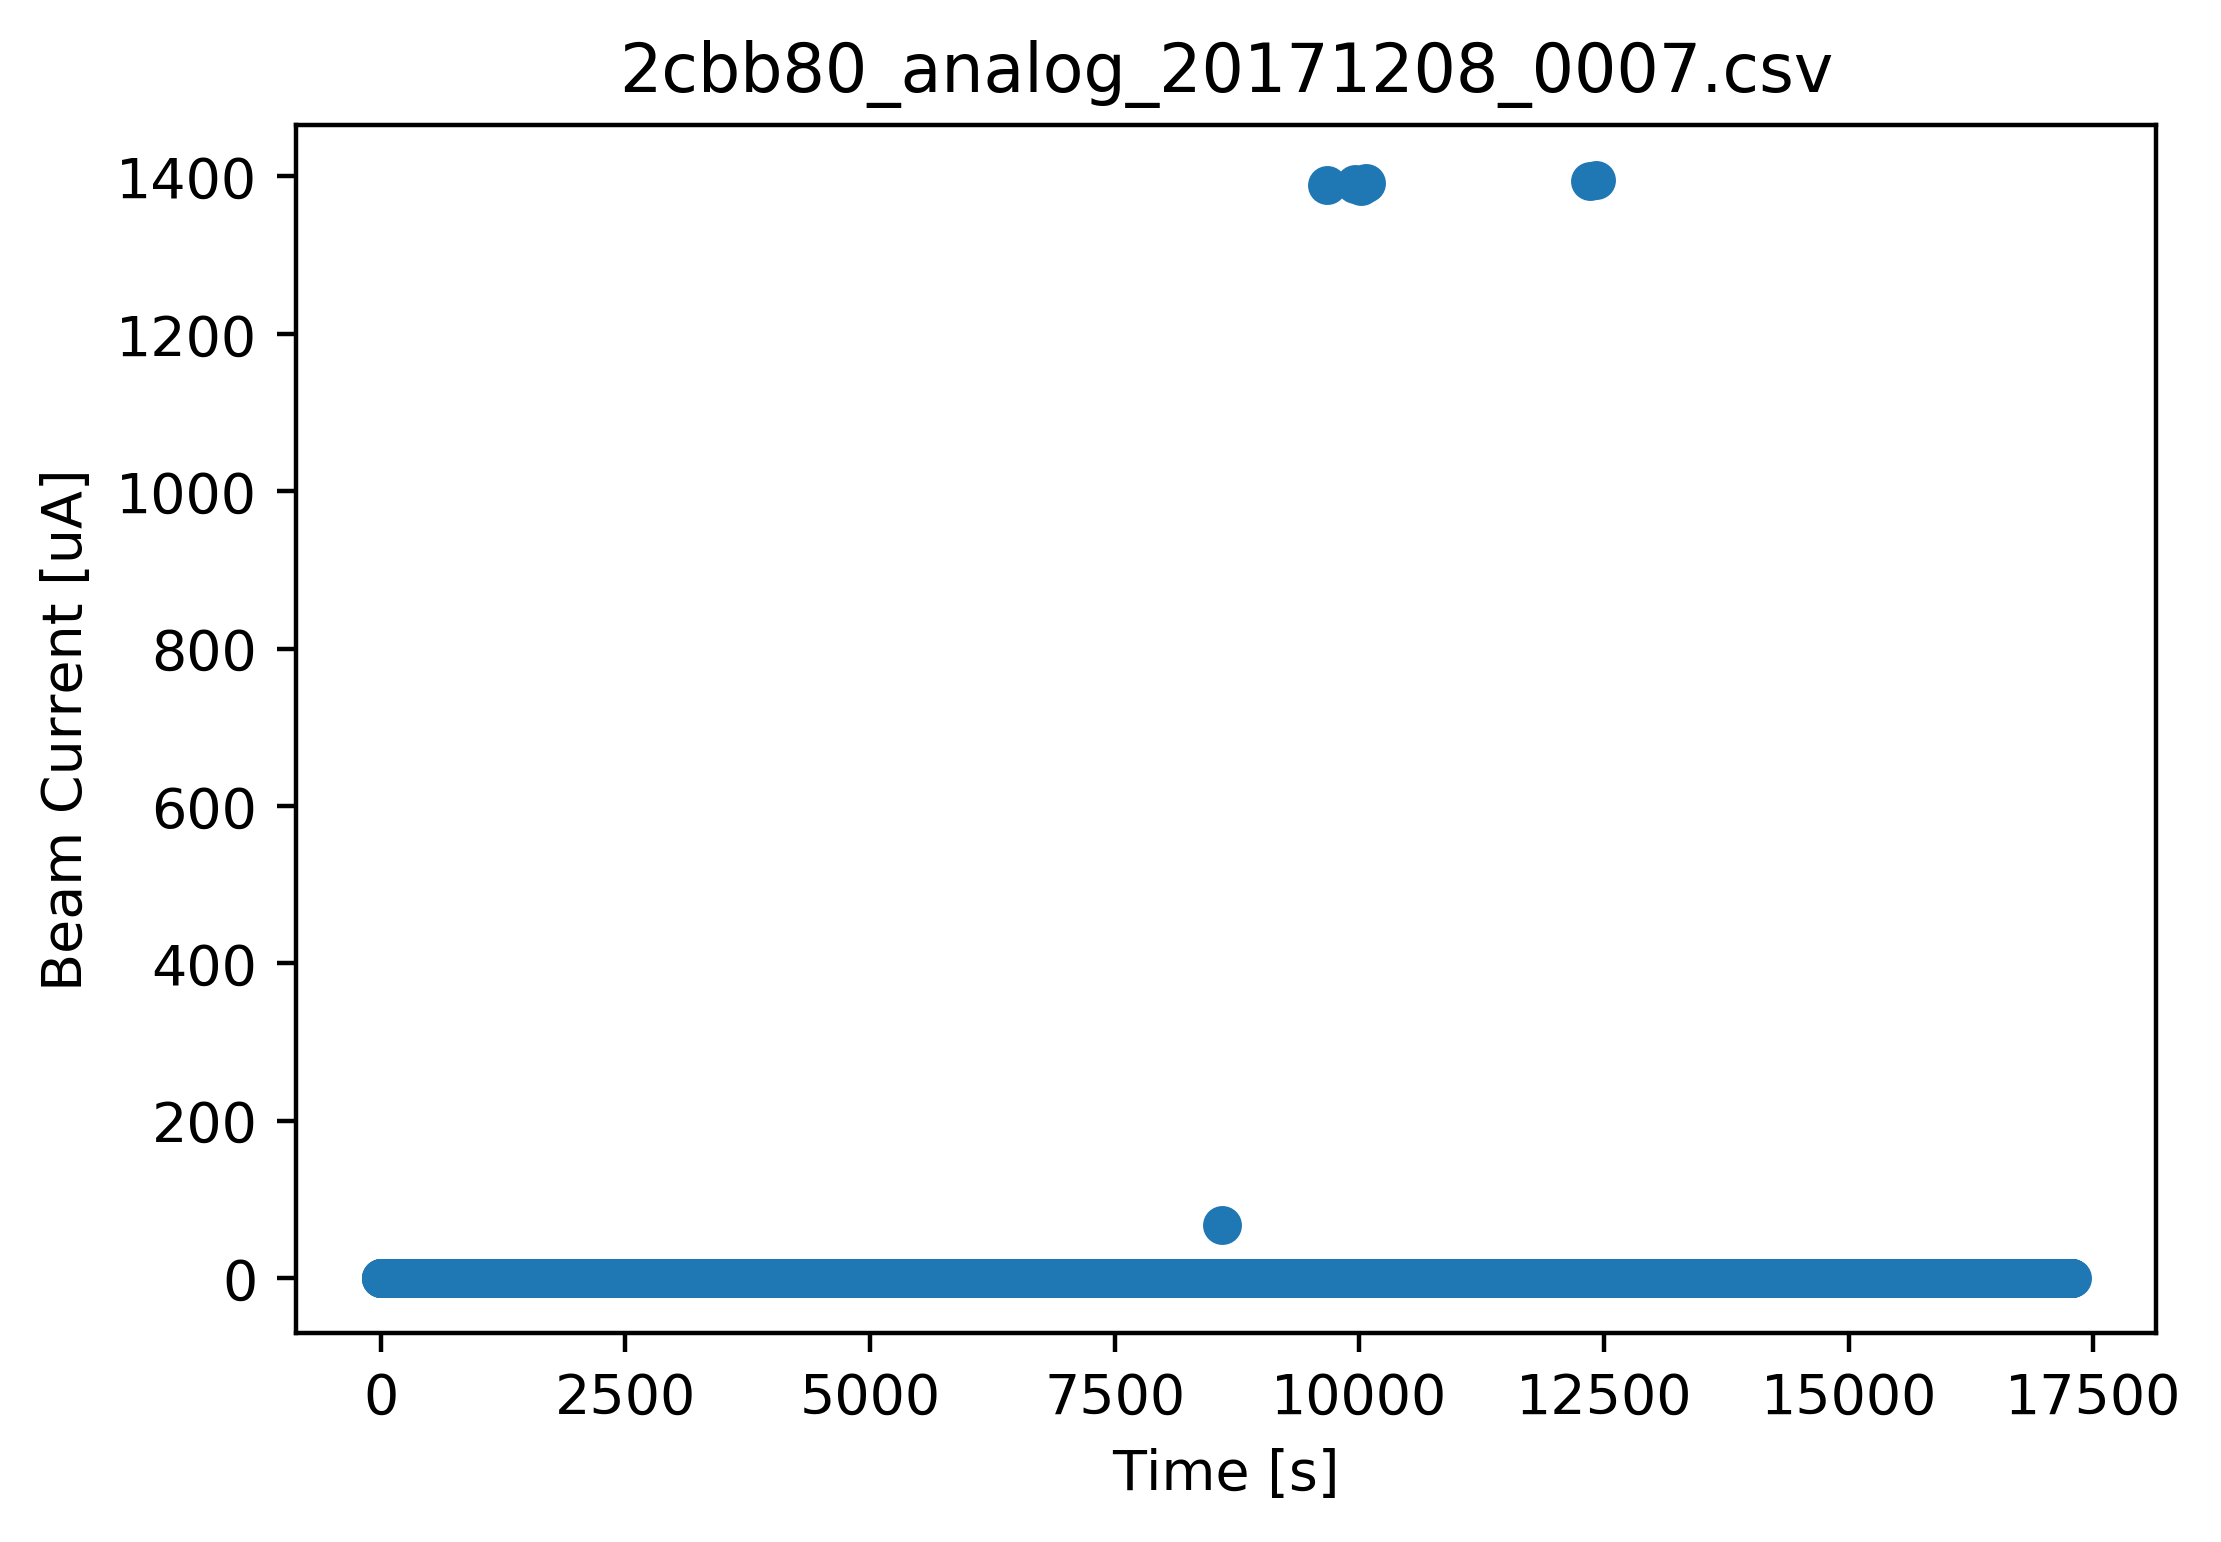

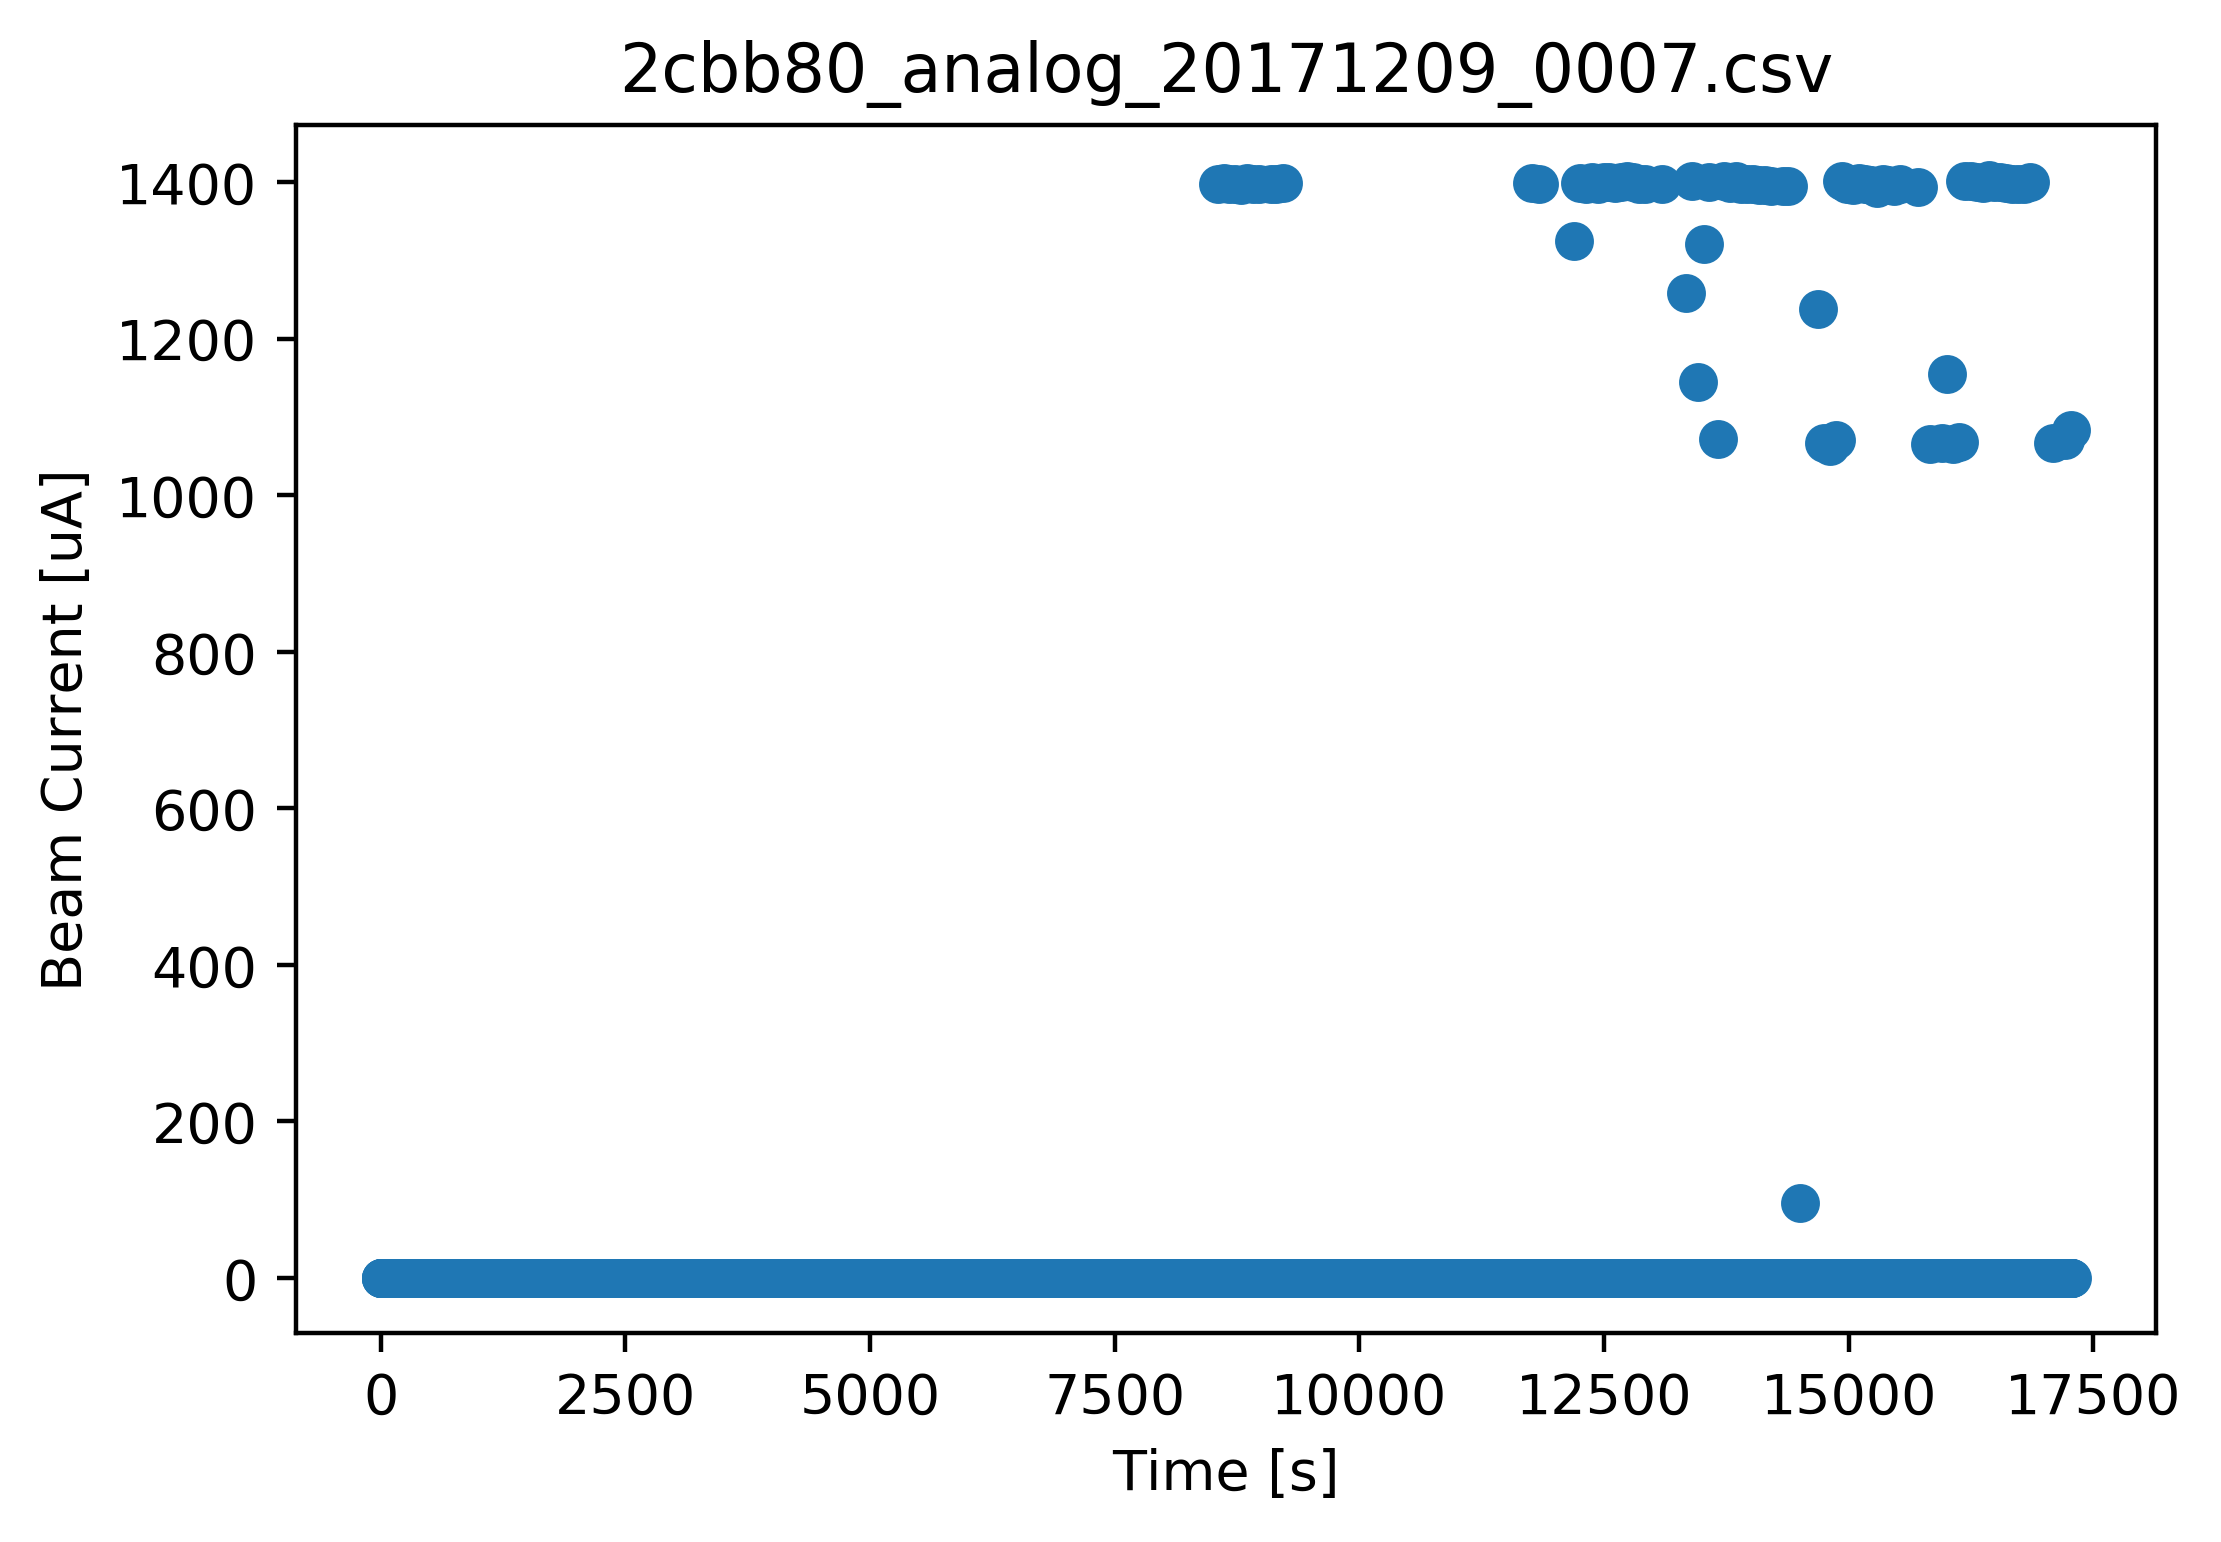

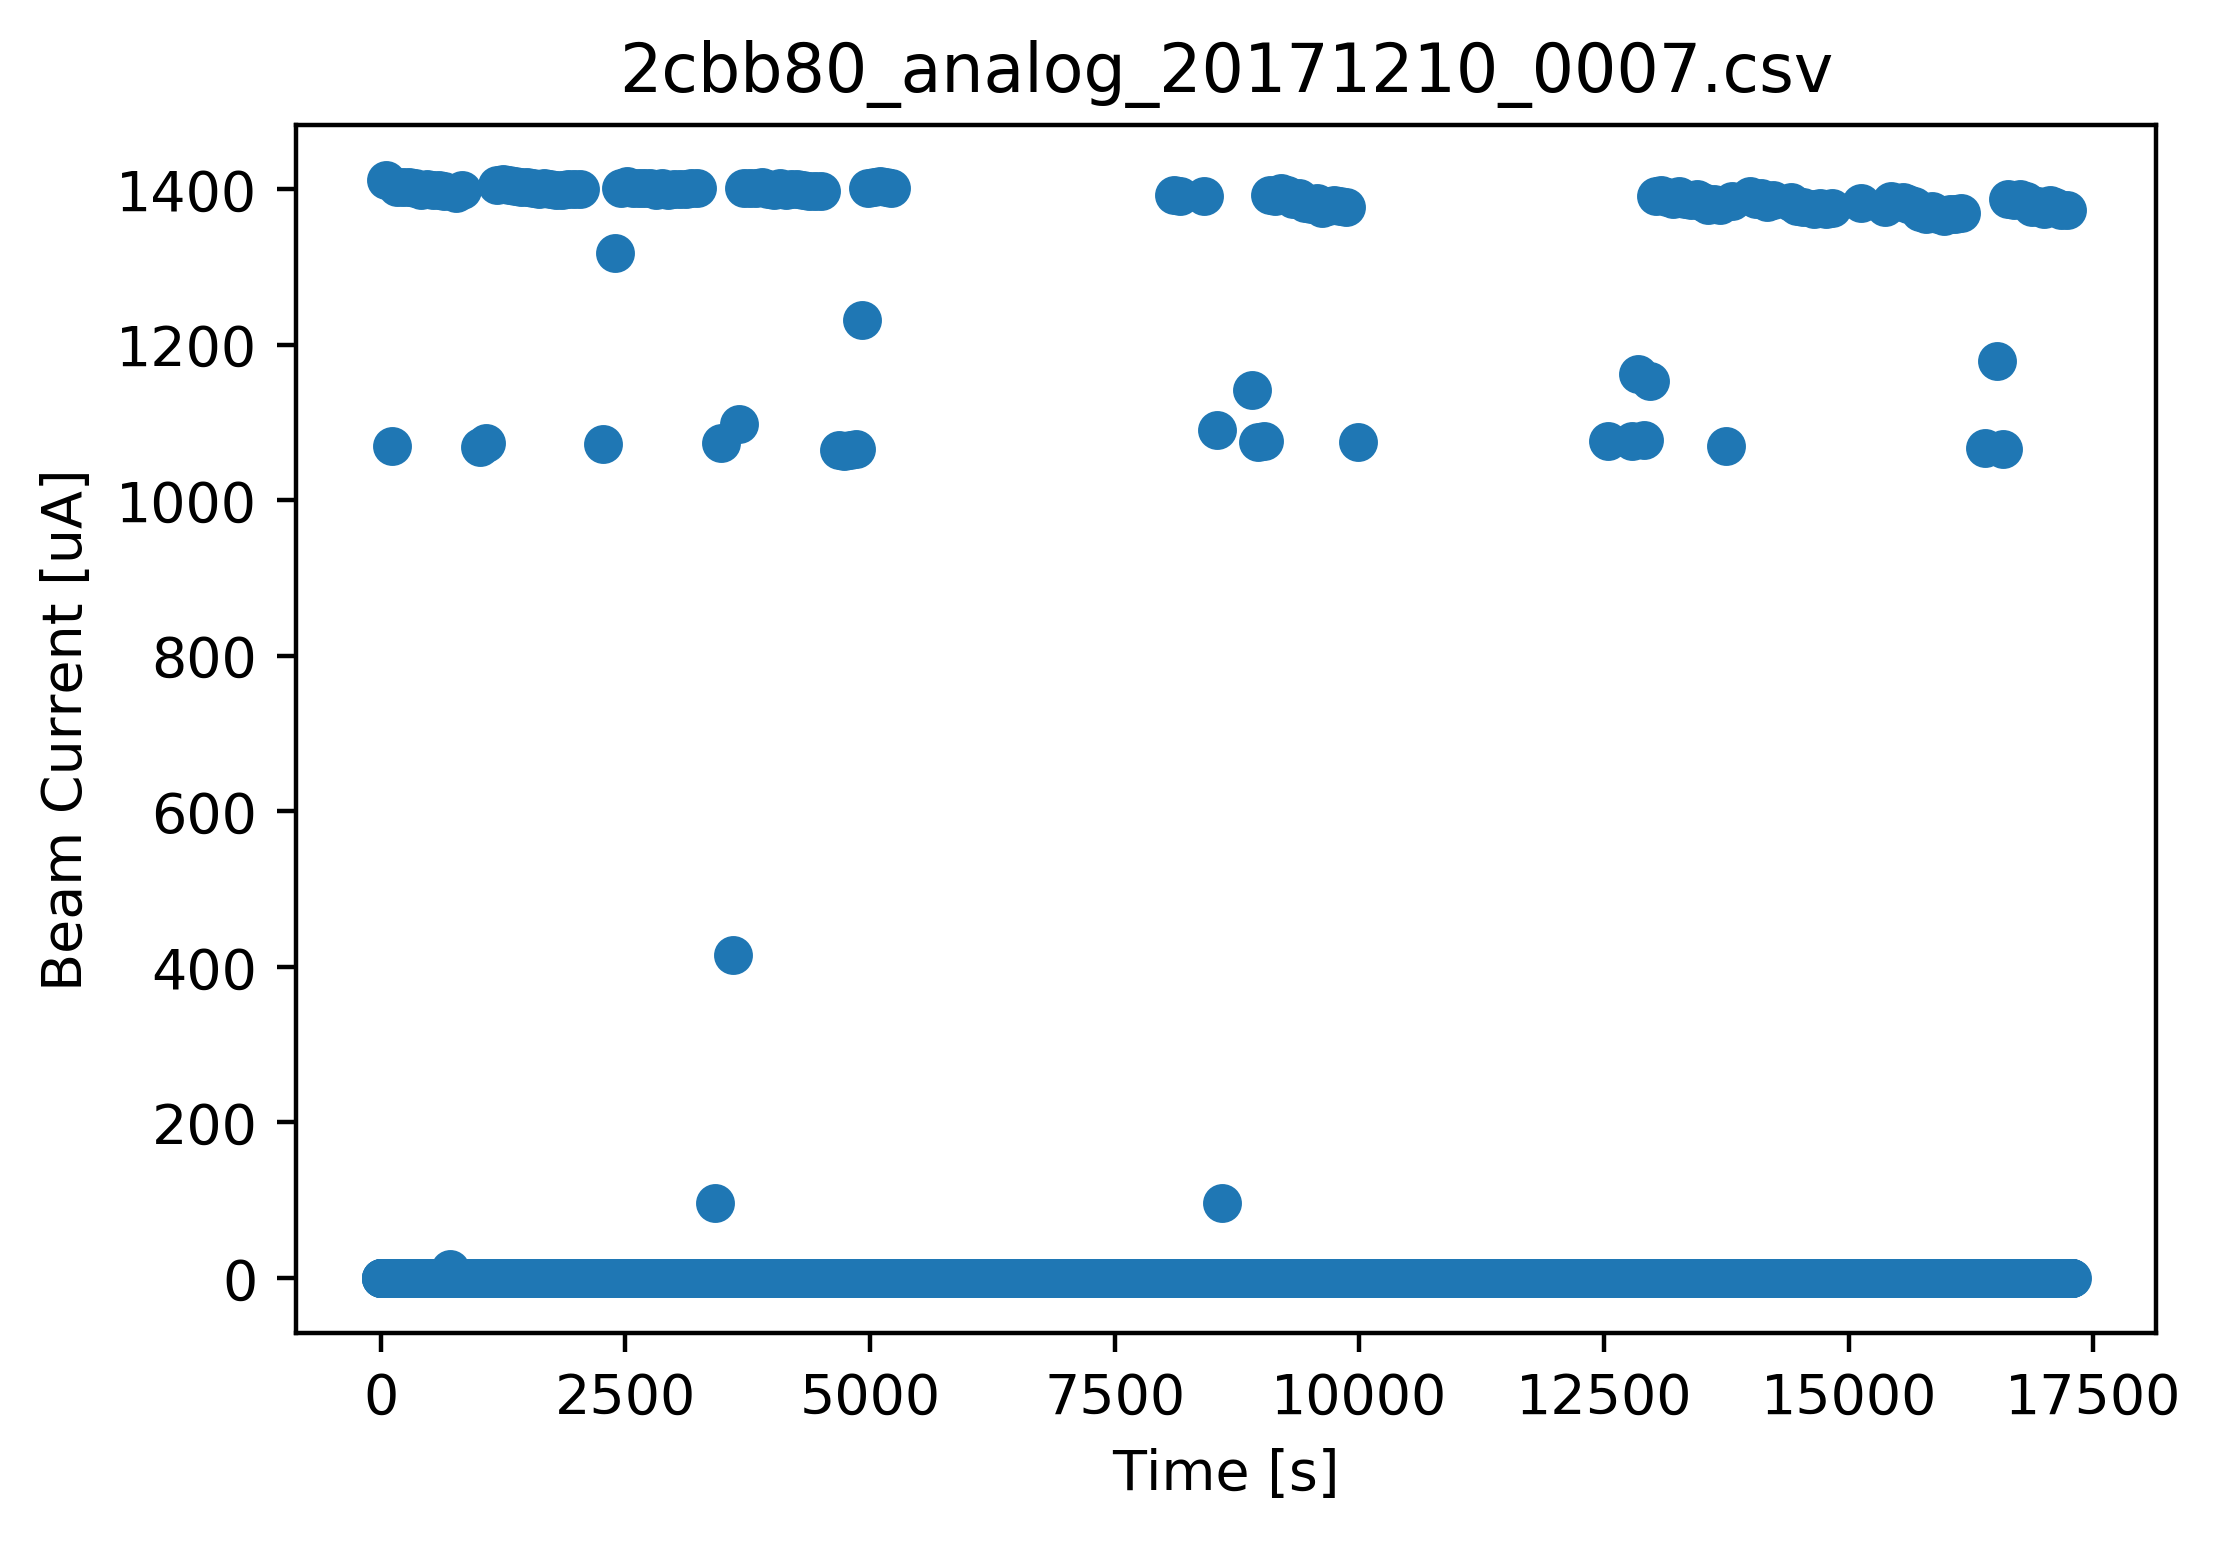

In [51]:
for filename in os.listdir('../data_p_beam'):
    data = np.loadtxt('../data_p_beam/' + filename, skiprows=1, delimiter = ';', usecols=(88));
    time = np.zeros((np.shape(data)))
    for i in range (0,np.shape(data)[0]):
        
        time[i] = i*2

    plt.clf()
    plt.scatter(time, data);
    plt.xlabel('Time [s]');
    plt.ylabel('Beam Current [uA]');
    plt.title(filename)
    plt.show()